# Azted G-dDT Single Custom Run

## Content

This custom run notebook consists of:
* A custom single run
* A custom Parameter Selection under Uncertainty Run 

Both are primarily useful to explore the model, its dynamics, the effects of different parameter choices, as well as the analysis type itself. 

## Requirements
First, make sure the requirements are installed. 

In [1]:
import seaborn as sns
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pandas as pd
import sys
sys.path.append('../')

from IPython.core.getipython import get_ipython

pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import custom_run
from aztec_gddt.params import *
from aztec_gddt.types import *

c:\Users\andre\Desktop\aztec-gddt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



For individual custom runs, the following parameters can currently be adjusted through custom run arguments.
You can check them out further in params.py, under 'SINGLE_RUN_PARAMS'.
Similarly, you can adjust any other parameters in params.py directly, such as the median for the L1 gas price series or different shock values.
However, the below list can be adjusted directly through arguments in the custom_run function.  

## Simulation Params
* uncle_count (e.g. = 0) # Currently not used, but could be adapted to pay out rewards to the next x highest scores by sequencer proposals (or to use them as backup for later phases)
* fee_subsidy_fraction (e.g. = 1.0)  # Currently not used, but could be adapted to pay out L1 gas fee or L1 blob gas fee cashbacks
* minimum_stake (e.g. = 30) # When Sequencers fall under the minimum stake after a slashing, they will attempt to top-up from their balance. If they do not have enough balance, they are from now on inactive. When running simulations with few agents, and low balances, sometimes blocks get skipped a lot due to a limited active sequencer set
* l1_blocks_per_day (e.g. = int(24 * 60 * 60 / 12.08)) # Type: Int # Conversion to distribute a daily block reward over all L2 blocks
* daily_block_reward (e.g. = 32) # In ETH, lets us vary the total daily block reward (so that different inflation assumptions can be adjusted)

## Phase Durations
* phase_duration_proposal_min_blocks (e.g. = 0) # Measured in L1 blocks. The PSuU instead runs use a Lower Bound per Upper Bound definition to create fixed / dynamical phases.
* phase_duration_proposal_max_blocks (e.g. = 10)  
* phase_duration_reveal_min_blocks (e.g. = 0)  
* phase_duration_reveal_max_blocks (e.g. = 10) 
* phase_duration_commit_bond_min_blocks (e.g. = 0)  
* phase_duration_commit_bond_max_blocks (e.g. = 10) 
* phase_duration_rollup_min_blocks (e.g. = 0)
* phase_duration_rollup_max_blocks (e.g. = 30)  
* phase_duration_race_min_blocks (e.g. = 0)
* phase_duration_race_max_blocks (e.g. = 30) 

## Stake durations
* stake_activation_period (e.g. = 40)   # Not extremely relevant right now, but could be used to have agents drop in / out of the active set
* unstake_cooldown_period (e.g. = 40)

## Behavioral Parameters
* final_probability (e.g. = .99) # Absent detailed assumptions on behavioral aspects of agents, we use a cumulative probability approaching 1 for the willingness test (which means we do not assume many malicious agents or technical failures)
* gas_threshold_for_tx (e.g. = 220)  # Sets the censorship threshold for L1 gas prices, after which agents are prohibited from making L1 transactions
* blob_gas_threshold_for_tx (e.g. = 220) # Sets the censorship threshold for L1 blob gas prices, after which agents are prohibited from making L1 transactions
* proving_marketplace_usage_probability (e.g. = .3) # Lets us vary the likelihood of sequencers choosing to use a 3rd party proving marketplace, versus self-proving
* rewards_to_provers (e.g. = .3)  # Share of total rewards going to the prover UUID 
* rewards_to_relay (e.g. = .01) # Share of total rewards going to the relay UUID 
* gwei_to_tokens (e.g. =1e-9) # Conversion of gwei to tokens. Currently, tokens are set to ETH. By setting the conversion factor (and adjusting absolute values of rewards) we could switch to native tokens.
* gas_estimators=DEFAULT_DETERMINISTIC_GAS_ESTIMATOR, # Defines from where to pull gas prices for L1 transactions 
* tx_estimators=DEFAULT_DETERMINISTIC_TX_ESTIMATOR, # Defines from where to pull transaction estimates for L2 blocks / proposals
* slash_params=SLASH_PARAMS, # Defines the sequencer slashing parameters
* gas_fee_l1_time_series=GAS_FEE_L1_TIME_SERIES_LIST[-1], # Defines the gas price time series
* gas_fee_blob_time_series=GAS_FEE_BLOB_TIME_SERIES_LIST[-1], # Defines the blob gas price time series
* commit_bond_amount (e.g. = 10.0)  # Defines the commitment bond amount
* op_cost_sequencer (e.g. = 1),  # (In Tokens aka ETH) Defines the sequencer operational cost amount that is currently used as a constant to evaluate profitability. Will likely be split into more granular cost assumptions
* op_cost_prover (e.g. = 1) # (In Tokens aka ETH) Defines the prover operational cost amount that is currently used as a constant to evaluate profitability. Will likely be split into more granular cost assumptions
* safety_factor_commit_bond (e.g. = 0.0) # To evaluate profitability based on a profit assumption, the safety factor defines the per_phase multiplier for the occuring gas (and blobgas) fees. A 1.0x would mean that the agent expects rewards > op_cost + fees + (1x fees)
* safety_factor_reveal_content (e.g. = 0.0)
* safety_factor_rollup_proof (e.g. = 0.0)
* past_gas_weight_fraction (e.g. = 0.9) # Smoothens the gas and blob gas time series, by bounding the change between two L1 block's gas prices



### User Input: Modifying Params for Custom Runs

In [3]:

# Params_to_modify consists of a dictionary with certain parameter choices.
# They can be changed for each run through the following argument. 
system_params = {
                    'gas_threshold_for_tx': [200], 
                    'blob_gas_threshold_for_tx': [210], 
                    'daily_block_reward': [32], 
                    'final_probability': [0.95], 
                    'commit_bond_amount': [3],
                    'phase_duration_proposal_min_blocks': [0],
                    'phase_duration_proposal_max_blocks': [10, 20],
                    'phase_duration_reveal_min_blocks': [0],
                    'phase_duration_reveal_max_blocks': [10, 20],
                    'phase_duration_commit_bond_min_blocks': [0],
                    'phase_duration_commit_bond_max_blocks': [10],
                    'phase_duration_rollup_min_blocks': [0],
                    'phase_duration_rollup_max_blocks': [30],
                    'phase_duration_rollup_min_blocks': [0],
                    'phase_duration_race_max_blocks': [30]
                    }

### User Input: Adjusting Simulation Parameters

In the next cell, the user can adjust:
* `N_timesteps`, the overall number of timesteps per simulation run. **Note:** Currently `N_timesteps` should be less than or equal to 1000. 
* `N_samples`, how many Monte Carlo runs are performed for the simulation. 


In [4]:
# N_timesteps lets us vary the simulation timesteps we want to run
N_timesteps = 1000

# N_samples defines the number of simulation runs we want
N_samples = 3

### User Input: Incorporating Censorship Data

This section loads data related to Layer 1 Builders and Validators. 

In the next cell, the user can adjust:
* `FILENAME` - the file where the original data can be found. 

**NOTE:** The provided default data file has been cleaned, with entries sorted by date, with duplicates removed and null values processed. If the user is working with a custom data file, please be sure that it meets these requirements.

In [5]:
# Read the data. 

FILENAME = "../data/eth_builder_validator_data.csv.gz"
original_data = pd.read_csv(FILENAME)


### Processing: Minor Data Cleanup

This portion filters down to the most relevant columns, and does conversion on the date associated with each block. 

In [6]:
# Do some slight cleanup.

relevant_cols = ['date', 'slot', 'block_number', 'builder', 'validator']
original_data['date'] =  pd.to_datetime(original_data['date'], 
                                       format='%Y-%m-%d %H:%M:%S')

### User Input: Set Date Range for Data

The `date` column contains `pandas` timestamps corresponding to the date and time when an individual L1 block was created. 

By default, all data is included. To see only a specific range of the data, change the `START_DATE` and `END_DATE` parameters below.

For instance, to see data for blocks for all of Q4 2023, one could use

```python
START_DATE = pd.to_datetime("2023-11-01 00:00:00")
END_DATE = pd.to_datetime("2024-01-01 00:00:00")
```

In [7]:
# Setting start date and end date

START_DATE = original_data['date'].iloc[0]
END_DATE = original_data['date'].iloc[-1]

data_to_use = original_data[(original_data['date'] >= START_DATE) & (original_data['date'] <= END_DATE)]

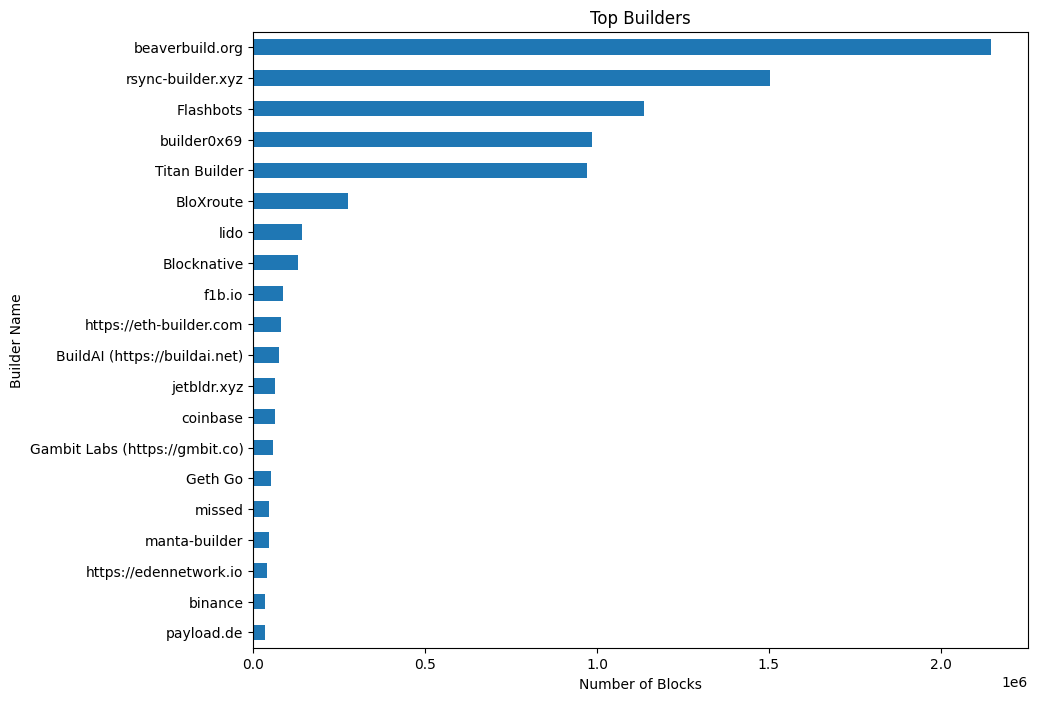

In [8]:
# Plot for top builders

# Number of top entries you want to display
NUM_TOP_ENTRIES = 20

# Character length of name, for readability
MAX_CHAR_LEN = 30

# Calculating the count of each unique value
counts = data_to_use['builder'].value_counts()

# Selecting the top N entries
top_n = counts.nlargest(NUM_TOP_ENTRIES)

# Creating a horizontal bar plot
plt.figure(figsize=(10, 8))
top_n.plot(kind='barh')

labels = [label[:MAX_CHAR_LEN] + '...'
         if len(label) > MAX_CHAR_LEN 
         else label 
         for label in top_n.index]

plt.xlabel('Number of Blocks')
plt.ylabel('Builder Name')
plt.yticks(ticks = range(NUM_TOP_ENTRIES), labels=labels)
plt.title('Top Builders')
plt.gca().invert_yaxis()  # To display the largest at the top
plt.show()

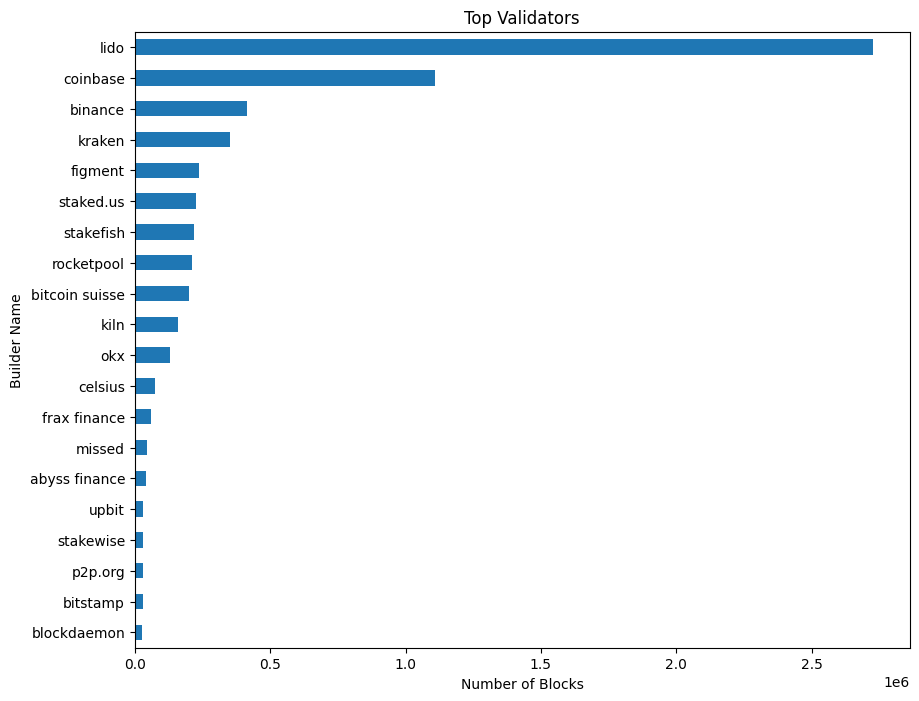

In [9]:
# Plot for top validators

# Number of top entries you want to display
NUM_TOP_ENTRIES = 20

# Character length of name, for readability
MAX_CHAR_LEN = 30

# Calculating the count of each unique value
counts = data_to_use['validator'].value_counts()

# Selecting the top N entries
top_n = counts.nlargest(NUM_TOP_ENTRIES)

# Creating a horizontal bar plot
plt.figure(figsize=(10, 8))
top_n.plot(kind='barh')

labels = [label[:MAX_CHAR_LEN] + '...'
         if len(label) > MAX_CHAR_LEN 
         else label 
         for label in top_n.index]

plt.xlabel('Number of Blocks')
plt.ylabel('Builder Name')
plt.yticks(ticks = range(NUM_TOP_ENTRIES), labels=labels)
plt.title('Top Validators')
plt.gca().invert_yaxis()  # To display the largest at the top
plt.show()

### User Input: Selecting Censoring Builders and Validators

In the cell below, the user can create two different censorship scenarios for the simulation. 

To create a scenario, modify the entries in the lists of `censoring_builders` and `censoring_validators`. Leave the list blank (`[]`) to have no censoring entities in the scenario.  

In [10]:
# USER INPUT: Censorship information

# Add here the lists of censoring builders and validators. 
# Leave empty for no censorship.

censoring_builders_one = ['Flashbots']
censoring_validators_one = ['abyss_finance']

censoring_builders_two = ['builder0x69']
censoring_validators_two = ['iido', 'coinbase']

### Processing: Building the Censorship Parameters and Adding Them to The Run

In [11]:
# Build censoring params
censorship_params_one = build_censor_params(data = data_to_use, 
                        censoring_builders = censoring_builders_one,
                        censoring_validators = censoring_validators_one,
                        start_time = 0,
                        num_timesteps = N_timesteps)

censorship_params_two = build_censor_params(data = data_to_use, 
                        censoring_builders = censoring_builders_two,
                        censoring_validators = censoring_validators_two,
                        start_time = 0,
                        num_timesteps = N_timesteps)


In [12]:
censorship_series_builder_one = censorship_params_one["censorship_series_builder"]
censorship_series_validator_one = censorship_params_one["censorship_series_validator"]

censorship_series_builder_two = censorship_params_two["censorship_series_builder"]
censorship_series_validator_two = censorship_params_two["censorship_series_validator"]

censorship_params = {"censorship_series_builder": [censorship_series_builder_one[0], censorship_series_builder_two[0]],
                    "censorship_series_validator": [censorship_series_validator_one[0], censorship_series_validator_two[0]]}


In [13]:
# Combine censorship params with structural params

params_to_modify = {**system_params,
                    **censorship_params} 

### Processing: Running the Simulation and Recording the Data

In [14]:
# TODO: Change for parameter sweep? 

#sim_df saves the run to a dataframe, from which we can plot any state measurements or metrics
sim_df = custom_run(N_timesteps=N_timesteps,
                    N_samples=N_samples,
                    params_to_modify=params_to_modify)

Flattening results: 100%|██████████| 6/6 [00:00<00:00, 93.95it/s]


In [15]:
def extract_l1_timestep_from_series(row, col):
    l1_timestep = row['time_l1']
    val = int(row[col][l1_timestep])
    return val

def extract_builder_from_series(row):
    return extract_l1_timestep_from_series(row = row, 
                                           col = 'censorship_series_builder')

def extract_validator_from_series(row):
    return extract_l1_timestep_from_series(row = row,
                                           col = 'censorship_series_validator')



In [23]:
sim_df['censoring_builder'] = sim_df.apply(extract_builder_from_series, axis = 1)
sim_df['censoring_validator'] = sim_df.apply(extract_validator_from_series, axis = 1)

sim_df['censored_block'] = sim_df['censoring_builder'] | sim_df['censoring_validator']

In [30]:
sim_df.columns

Index(['index', 'timestep', 'time_l1', 'delta_l1_blocks', 'advance_l1_blocks',
       'slashes_to_provers', 'slashes_to_sequencers', 'total_rewards_provers',
       'total_rewards_relays', 'total_rewards_sequencers', 'agents',
       'current_process', 'transactions', 'gas_fee_l1', 'gas_fee_blob',
       'finalized_blocks_count', 'cumm_block_rewards', 'cumm_fee_cashback',
       'cumm_burn', 'token_supply', 'simulation', 'subset', 'run',
       'delta_blocks', 'label', 'timestep_in_blocks', 'uncle_count',
       'fee_subsidy_fraction', 'minimum_stake', 'l1_blocks_per_day',
       'daily_block_reward', 'logic', 'phase_duration_proposal_min_blocks',
       'phase_duration_proposal_max_blocks',
       'phase_duration_reveal_min_blocks', 'phase_duration_reveal_max_blocks',
       'phase_duration_commit_bond_min_blocks',
       'phase_duration_commit_bond_max_blocks',
       'phase_duration_rollup_min_blocks', 'phase_duration_rollup_max_blocks',
       'phase_duration_race_min_blocks', 'pha

**Question:** Why aren't `advance_l1_blocks` and `delta_l1_blocks` ever positive?

In [41]:
sim_df['advance_l1_blocks'].unique()

array([0], dtype=int64)

In [42]:
sim_df['delta_l1_blocks'].unique()

array([0], dtype=int64)

In [76]:
mask = (sim_df['finalized_blocks_count'].shift(-1) > sim_df['finalized_blocks_count']) & (sim_df['censored_block'])

sim_df[mask]['finalized_blocks_count']

625     18
816     22
1984    30
2688    25
2920    34
3172     3
3219     4
3325     6
3441     9
4657    13
4758    14
5150     1
5297     5
5726    14
5807    16
5943    18
Name: finalized_blocks_count, dtype: int64

In [71]:
sim_df.shift(-1)[mask]['finalized_blocks_count']

625     19.0
816     23.0
1984    31.0
2688    26.0
2920    35.0
3172     4.0
3219     5.0
3325     7.0
3441    10.0
4657    14.0
4758    15.0
5150     2.0
5297     6.0
5726    15.0
5807    17.0
5943    19.0
Name: finalized_blocks_count, dtype: float64

In [77]:
sim_df.shift(1)[mask]['censored_block']

625     0.0
816     0.0
1984    0.0
2688    0.0
2920    0.0
3172    0.0
3219    0.0
3325    0.0
3441    0.0
4657    0.0
4758    0.0
5150    0.0
5297    0.0
5726    0.0
5807    1.0
5943    0.0
Name: censored_block, dtype: float64

In [72]:
sim_df[mask]['censored_block']

625     1
816     1
1984    1
2688    1
2920    1
3172    1
3219    1
3325    1
3441    1
4657    1
4758    1
5150    1
5297    1
5726    1
5807    1
5943    1
Name: censored_block, dtype: int64

In [68]:
sim_df.iloc[2002]

index                         2016
timestep                         0
time_l1                          0
delta_l1_blocks                  0
advance_l1_blocks                0
                              ... 
safety_factor_rollup_proof     0.0
past_gas_weight_fraction       0.9
censoring_builder                0
censoring_validator              0
censored_block                   0
Name: 2002, Length: 68, dtype: object

In [69]:
sim_df.shift(-1).head()

index  timestep  time_l1  delta_l1_blocks  advance_l1_blocks  \
0    1.0       1.0      1.0              0.0                0.0   
1    2.0       2.0      2.0              0.0                0.0   
2    3.0       3.0      3.0              0.0                0.0   
3    4.0       4.0      4.0              0.0                0.0   
4    5.0       5.0      5.0              0.0                0.0   

   slashes_to_provers  slashes_to_sequencers  total_rewards_provers  \
0                 0.0                    0.0                    0.0   
1                 0.0                    0.0                    0.0   
2                 0.0                    0.0                    0.0   
3                 0.0                    0.0                    0.0   
4                 0.0                    0.0                    0.0   

   total_rewards_relays  total_rewards_sequencers  ... commit_bond_amount  \
0                   0.0                       0.0  ...                3.0   
1                   0.0                       0.0  ...                3.0   
2                   0.0                       0.0  ...                3.0   
3                   0.0                       0.0  ...                3.0   
4                   0.0                       0.0  ...                3.0   

  op_cost_sequencer op_cost_prover  safety_factor_commit_bond  \
0               0.0            0.0                        0.0   
1               0.0            0.0                        0.0   
2               0.0            0.0                        0.0   
3               0.0            0.0                        0.0   
4               0.0            0.0                        0.0   

   safety_factor_reveal_content  safety_factor_rollup_proof  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   

   past_gas_weight_fraction  censoring_builder  censoring_validator  \
0                       0.9                0.0                  0.0   
1                       0.9                0.0                  0.0   
2                       0.9                0.0                  0.0   
3                       0.9                0.0                  0.0   
4                       0.9                0.0                  0.0   

  censored_block  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 68 columns]

In [65]:
sim_df.iloc[2001]['finalized_blocks_count']

31

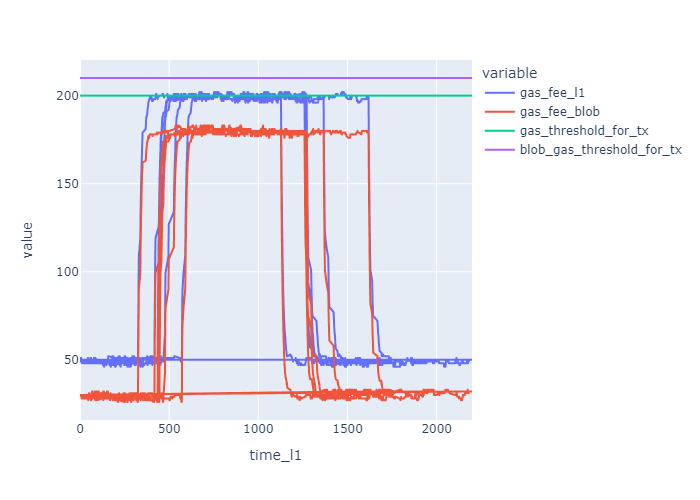

In [24]:
# This is a simple graph letting us check the gas and blob gas fees over the simulation run, as well as the censorship thresholds defining when no L1 transactions at all can be made. 
px.line(sim_df,
           x='time_l1',
        y=['gas_fee_l1', 
        'gas_fee_blob', 
        'gas_threshold_for_tx',
         'blob_gas_threshold_for_tx'],
         )

Text(0.5, 1.0, 'Visualizing Transition Through Phases')

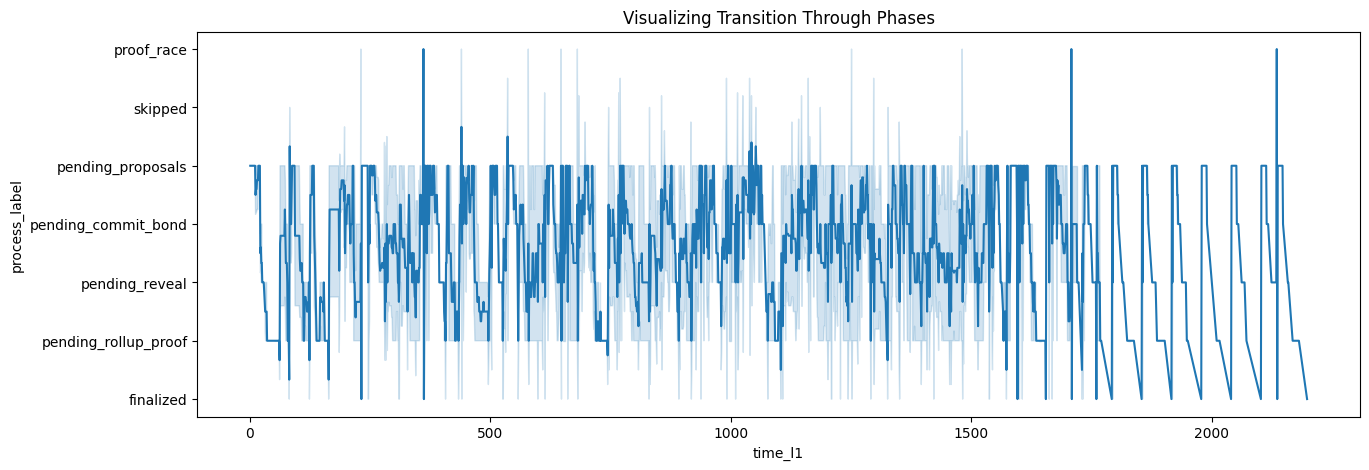

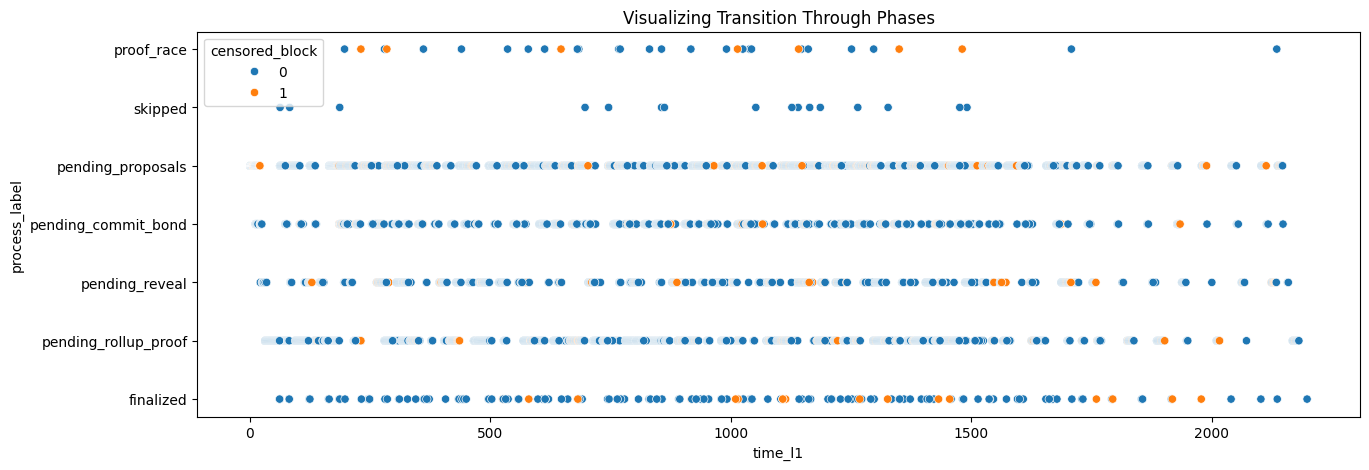

In [26]:
# Following visualization allows us to examine the transition through phases, until a block is either finalized or skipped.
fig_df = sim_df.copy()

fig_df['process_order'] = fig_df.current_process.map(
    lambda x: x.phase.value if x is not None else None)
fig_df['process_label'] = fig_df.current_process.map(
    lambda x: x.phase.name if x is not None else None)
# .query("time_l1 > 320 & time_l1 < 370")
fig_df = fig_df.sort_values(['process_order', 'timestep'])


plt.figure(figsize=(15, 5))
sns.lineplot(x=fig_df.time_l1,
             y=fig_df.process_label)
plt.title("Visualizing Transition Through Phases")

plt.figure(figsize=(15, 5))
sns.scatterplot(data = fig_df, 
                x='time_l1',
                y='process_label',
                hue = 'censored_block')
plt.title("Visualizing Transition Through Phases")

<Axes: xlabel='timestep', ylabel='time_l1'>

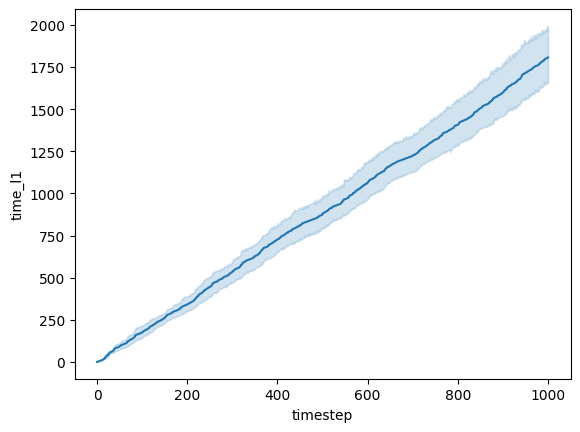

In [19]:
# As seen before, while we defined 1000 simulation timestep, due to some efficiency measures, we are simulating more L1 blocks than we have simulation timesteps
# Time_l1 are the L1 blocks (12sec), while timestep gives us the simulation steps
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

Text(0.5, 1.0, 'phase_duration_proposal_max_blocks vs. finalized_blocks_count')

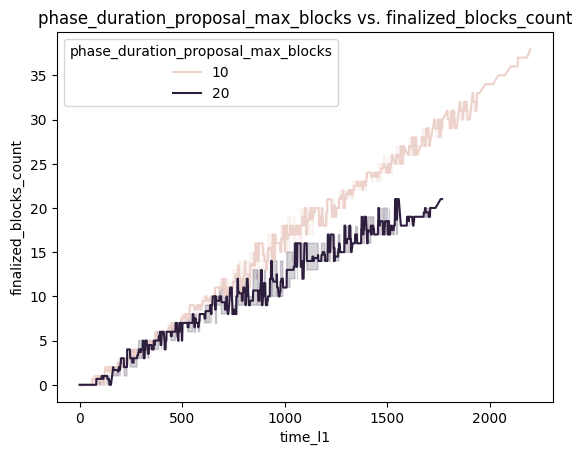

In [20]:
# How many blocks were we able to finalize per simulated L1 block? 
metric_col_name = 'finalized_blocks_count'
param_col_name = 'phase_duration_proposal_max_blocks'

sns.lineplot(x=sim_df.time_l1, 
             y=sim_df[metric_col_name],
             hue = sim_df[param_col_name])
plt.title(f"{param_col_name} vs. {metric_col_name}")

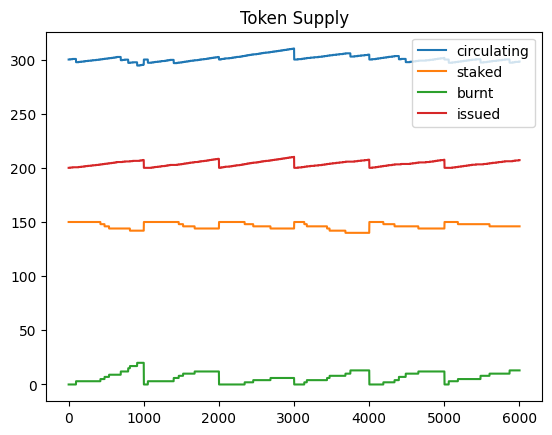

In [21]:
# The token supply is calculated from specific holdings of agents.
# When a Sequencer gets slashed, but has enough balance to top up, they will transfer from their balance to their stake. 
ts_df = sim_df.token_supply.apply(lambda x: pd.Series(x.__dict__))
ts_df.plot(kind='line')
plt.title("Token Supply")
plt.show()

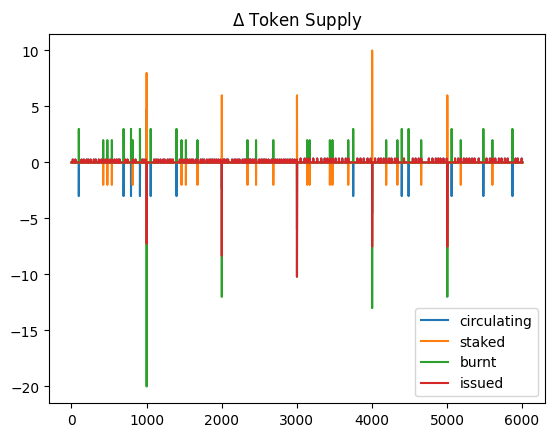

In [22]:
# The token supply is calculated from specific holdings of agents.
# When a Sequencer gets slashed, but has enough balance to top up, they will transfer from their balance to their stake. 
ts_df = sim_df.token_supply.apply(lambda x: pd.Series(x.__dict__)).diff()
ts_df.plot(kind='line')
plt.title("$\Delta$ Token Supply")
plt.show()

## PSUU Run

# TODO: Figure out the process that will be used to get to the base_df. 
# Question: 

## Preselected Overview of Plots

## General Statistical Overview of Governance Surface Parameters

In [ ]:
base_df.set_index(governance_surface_params).describe()

simulation         subset          run  proportion_race_mode  \
count  110592.000000  110592.000000  110592.0000         110592.000000   
mean      736.780084      11.997911       2.0000              0.019686   
std       425.670778       7.210990       0.8165              0.022172   
min         0.000000       0.000000       1.0000              0.000000   
25%       368.000000       6.000000       1.0000              0.000000   
50%       737.000000      12.000000       2.0000              0.016667   
75%      1105.000000      18.000000       3.0000              0.032258   
max      1474.000000      24.000000       3.0000              0.214286   

       proportion_slashed_prover  proportion_slashed_sequencer  \
count              110592.000000                 110592.000000   
mean                    0.009527                      0.009968   
std                     0.015752                      0.015813   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.019231                      0.020408   
max                     0.181818                      0.185185   

       proportion_skipped  average_duration_finalized_blocks  \
count       110592.000000                      110592.000000   
mean             0.009527                          75.932392   
std              0.015752                          34.129395   
min              0.000000                          23.340659   
25%              0.000000                          43.000000   
50%              0.000000                          71.650000   
75%              0.019231                         108.000000   
max              0.181818                         129.000000   

       stddev_duration_finalized_blocks  average_duration_nonfinalized_blocks  \
count                     110592.000000                          37280.000000   
mean                           5.055230                             68.383637   
std                            7.052563                             34.150773   
min                            0.000000                             26.000000   
25%                            0.000000                             35.000000   
50%                            1.856740                             56.000000   
75%                            6.751227                            100.000000   
max                           40.960083                            130.000000   

       stddev_duration_nonfinalized_blocks  delta_total_revenue_agents  
count                        110592.000000                    110592.0  
mean                              5.055230                         0.0  
std                               7.052563                         0.0  
min                               0.000000                         0.0  
25%                               0.000000                         0.0  
50%                               1.856740                         0.0  
75%                               6.751227                         0.0  
max                              40.960083                         0.0

# Uncertainty surrounding protocol slots

Currently, agents make decisions based on imposed functional forms. 
As an example, agents decide whether to make a transaction based on profitability tests. As we do not know enough about the actual supply cost model, our current best approach is to set a global op_cost parameter to evaluate against. 
While this approach lets us iterate quickly, it also means that current results are likely to change significantly by introducing more realistic slots. 
Below is a list of some slots we could iterate on or slot in reasonable assumptions.

| Full Name |  Abbreviation | Current Form | Likely Direction to move in |
| --- | --- | ---| ---|
| `Operational Cost`| `op_cost` | global constant per agent type | per action cost item |
| `Block Reward`| `daily_block_reward` | Daily block reward constant which is distributed over maximum duration phases | dynamic block reward |
| `Probability to use a Proving marketplace`| `proving_marketplace_usage_probability` | global constant probability | per agent type [0, 1], mean: 0.7 |
| `L2 Transaction Fees`| `transaction_average_fee_per_size` | global average fee, using the proposal size to decide fee | realistic tx fee for profitability calculations |

# Decision Tree and Parameter Importance

## Decision Tree Classification

Running parameter sweeps on a large number of trajectories creates a lot of data very fast. To increase speed of iteration we are using a technique called decision tree classification. 

A decision tree is a machine-learning-based classifier. Given the simulation results, for each threshold inequality the tree recursively associates different _samples_ from the results, according to sorting criteria based upon one or more of the protocol parameters of the simulation.

> Note: Treshold Inequalities define whether a KPI is better above, or below the median of all trajectories sampled. 

Each decision tree below corresponds to one of the threshold inequalities stated above. Where the decision tree is 'empty', the threshold inequality was either 1) always fulfilled during the simulations, or 2) never fulfilled during the simulations. In this case no sensitivity analysis can be performed, as the threshold inequalities do not vary according to the different parameter combinations that were swept.

The title of the decision tree includes the threshold inequality under scrutiny, in addition to a technical 'score' (usually "100%") and the number of simulation results used as the dataset. Within the decision tree presented, each **non-terminal** 'node' is labeled with the following information:

1. The sorting variable used and its cutoff value used for classification, in the form of `parameter_name <= x` where `x` is the cutoff value. Branches to the left of this node indicate _satisfaction_ of this inequality, while branches to the right indicate _violation_, i.e. `parameter_name > x`.
2. A Gini coefficient representing the method of recursive association used.
3. The total number of simulation results ("samples = y%") as a percentage "y" that are considered at this node.
4. The breakdown of the simulation results considered into left and right branches ("value = [p, 1-p]"), where "p" is the fraction of results that satisfy the `parameter_name <= x` constraint, and "1-p" the fraction satisfying `parameter_name > x`.
5. The classification of the majority of the simulation results at this node (note that this is not a final classification, as it appears in a non-terminal node, and can be arbitrary if the results are split equally across classes).

**Terminal** nodes ("leaves") represent the final classification of that proportion of the simulation results that arrive at the node, and have most of the same information as a non-terminal node, with the exception that there is no branching performed and hence no sorting variable displayed. Here the most important information is the classification (last line).

Non-terminal and terminal nodes colored in blue correspond to the threshold inequality being met, and by following blue boxes from a terminal node up to the root of tree a set of `parameter_name <= x` and/or `parameter_name > x` sorting criteria can be chained together. 

Upon successful classification, it is usual for the terminal node to have a breakdown "value = [1.0, 0.0]" or "value = [0.0, 1.0]", indicating that 100% of the remaining simulation results treated are either satisfying the threshold inequality under treatment (left value is 1.0), or not satisfying the threshold inequality (right value is 1.0).

For further information regarding the decision tree approach adopted here please see the [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#) documentation for the scikit-learn library.

## Feature Importance

Below each non-empty decision tree is a bar graph indicating the relative importance of each swept protocol parameter ("feature") in determining the satisfaction of the threshold inequality. This leverages the use of "random forests", which is a technique to average over many different decision tree realizations over different subsets of the simulation results, assessing the relative contribution of each protocol parameter in the branching of each tree. Roughly speaking, the more times a protocol parameter was used in the branching process, the higher its importance is to the threshold inequality--in other words, the protocol parameter carries a larger 'weight' in determining satisfaction or violation of the inequality, and so the inequality is more sensitive to the values of the parameter.

For further information regarding the random forest and feature importance approach adopted here please see the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation from the `scikit-learn` library.

## Group 1 Tree Importance Plots

In [ ]:
goal_name = "G1"
group_name = G1

final_G1_df = calculate_goal_score(grouped_df = base_df,
                    group = group_name,
                    new_column_name = f"{goal_name}_final_score" )

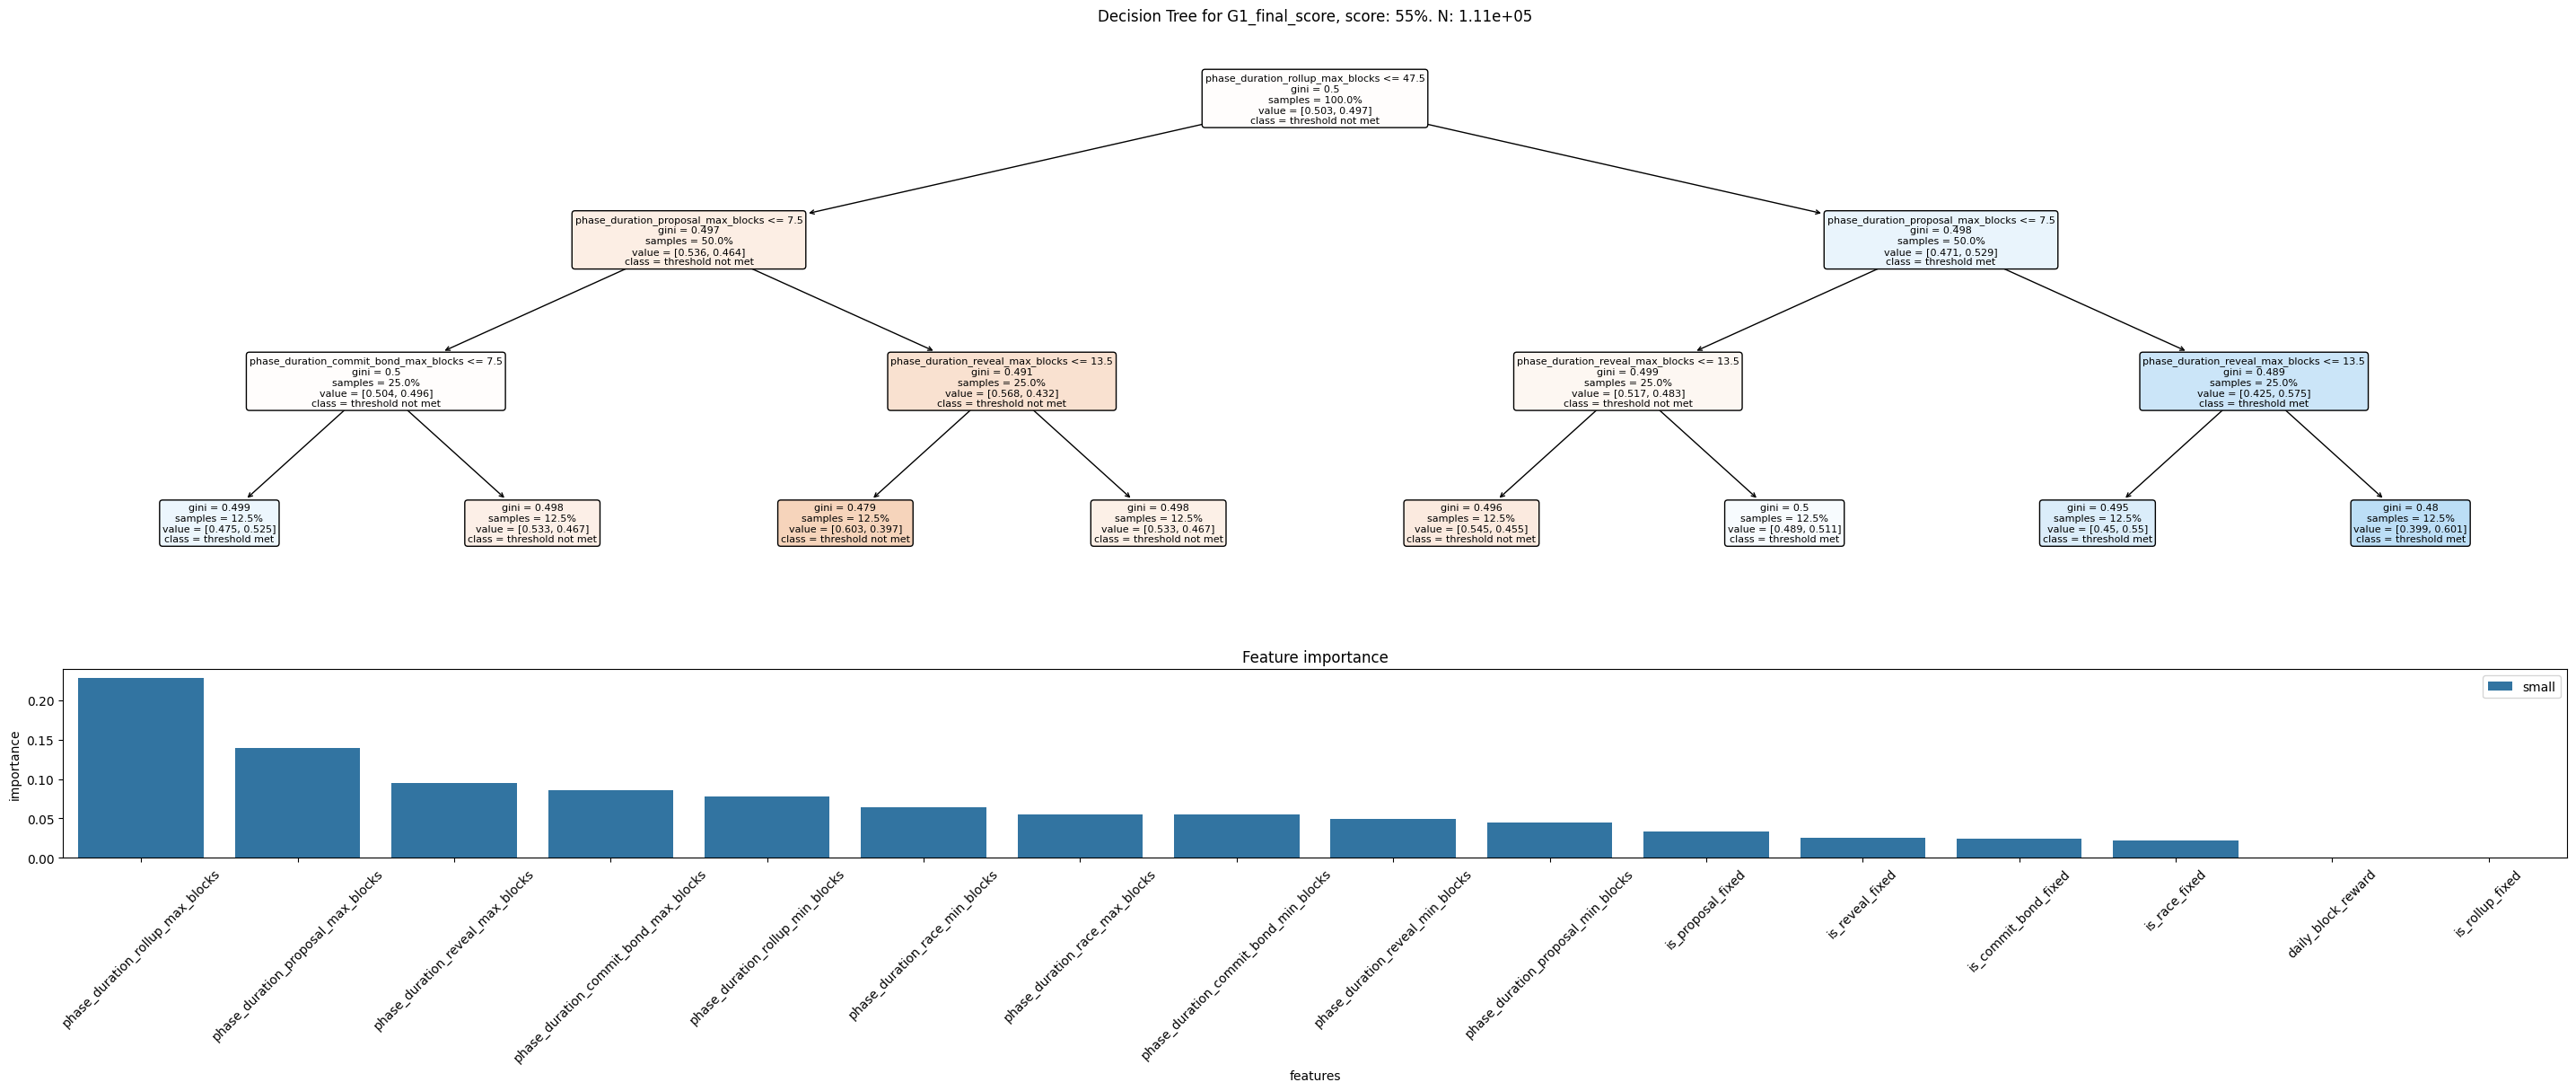

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for G1_final_score, score: 55%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(final_G1_df,
                                      col_name = "G1_final_score",
                                      success_criteria='higher_than_median')


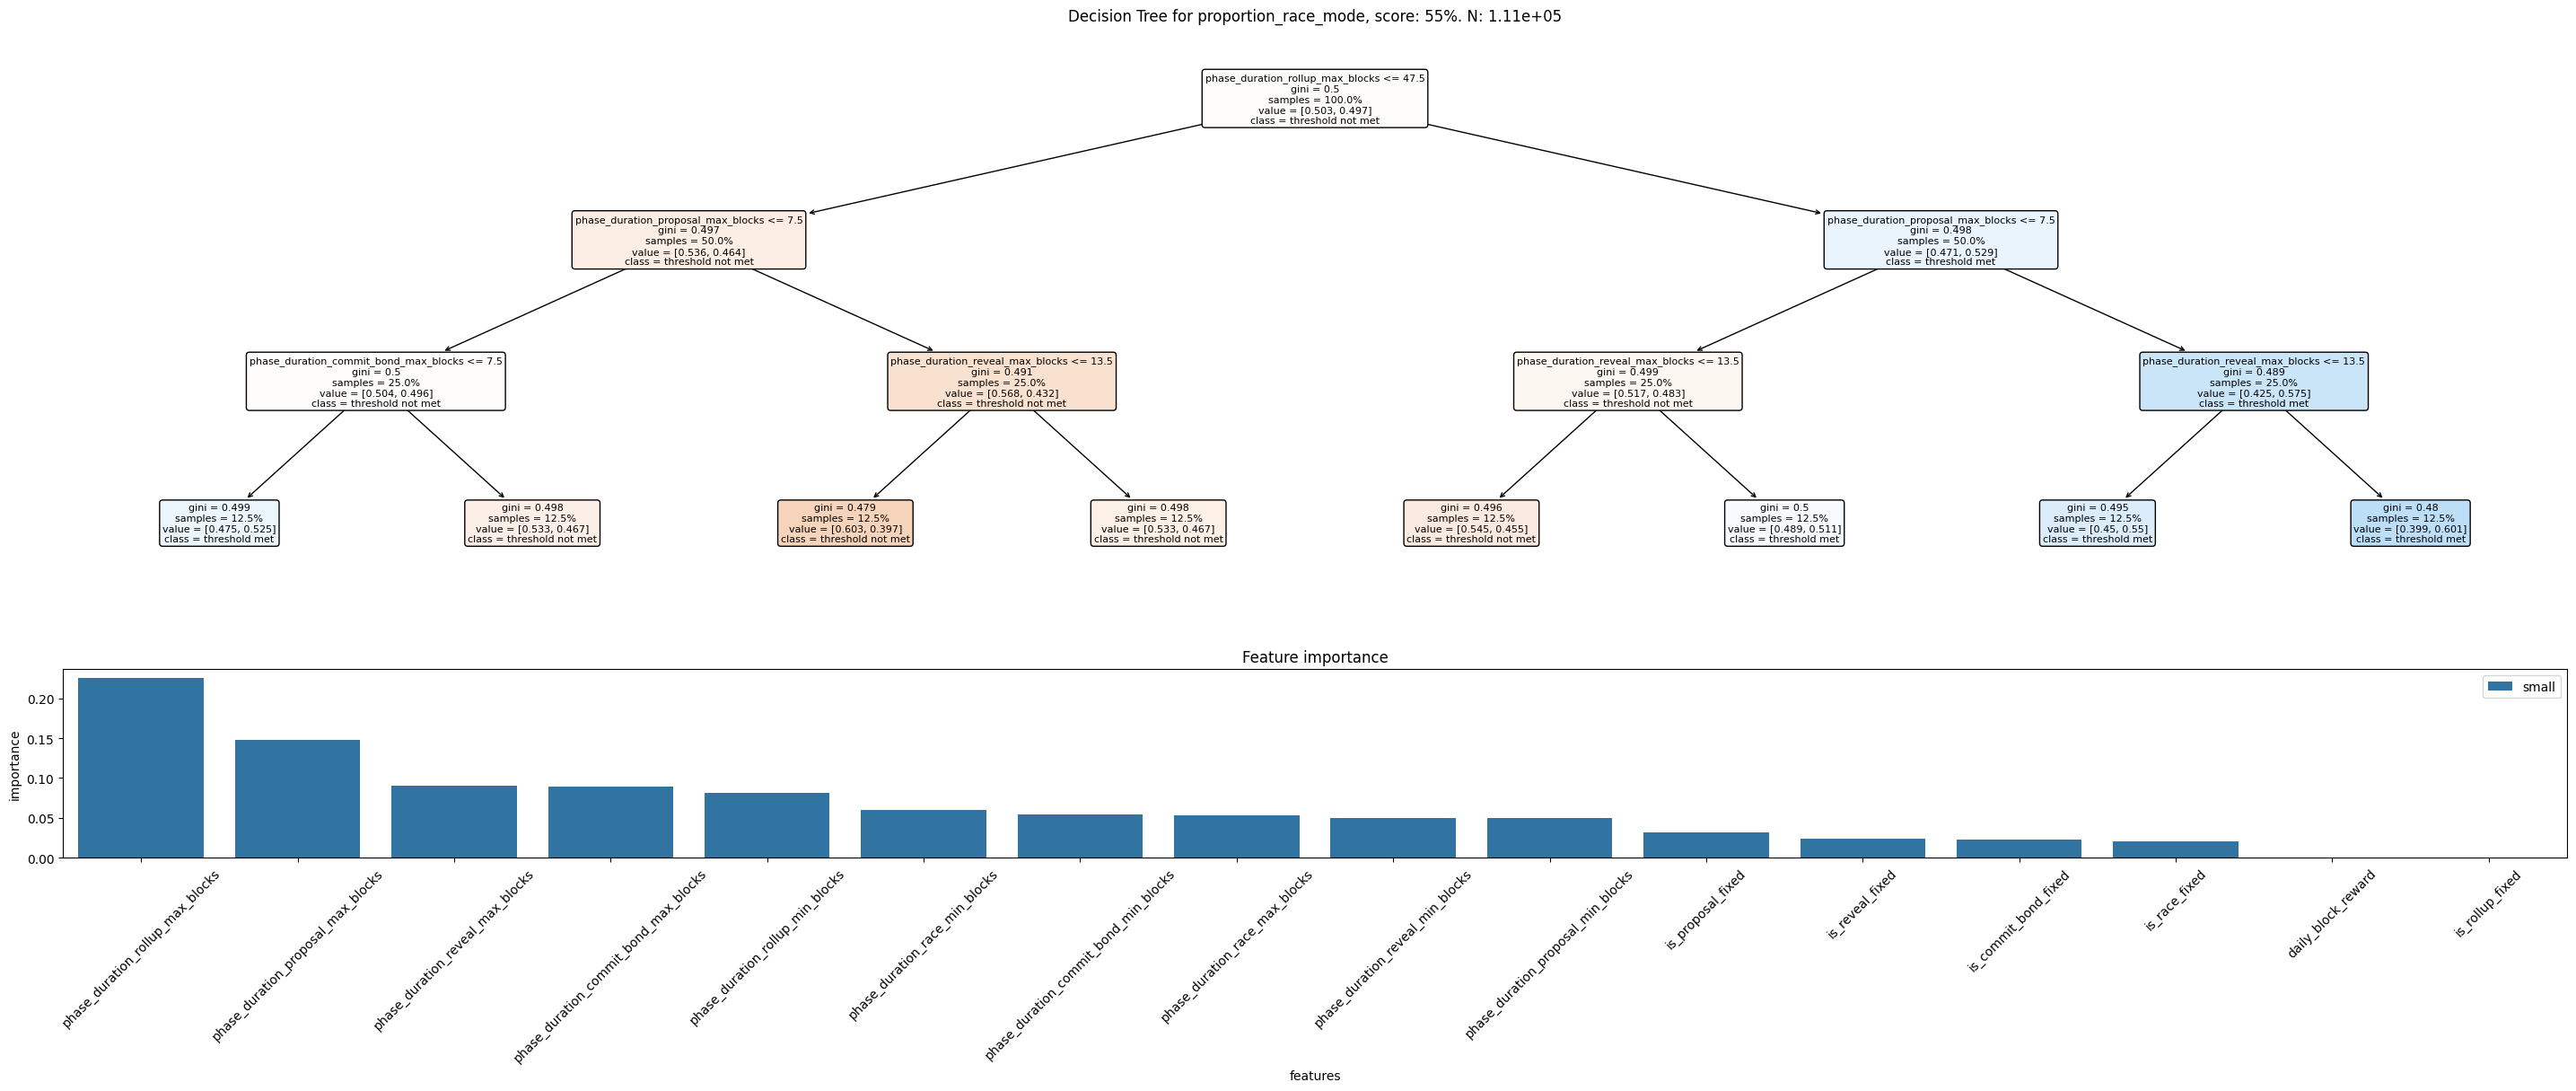

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_race_mode, score: 55%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_race_mode",
                                      success_criteria='lower_than_median')

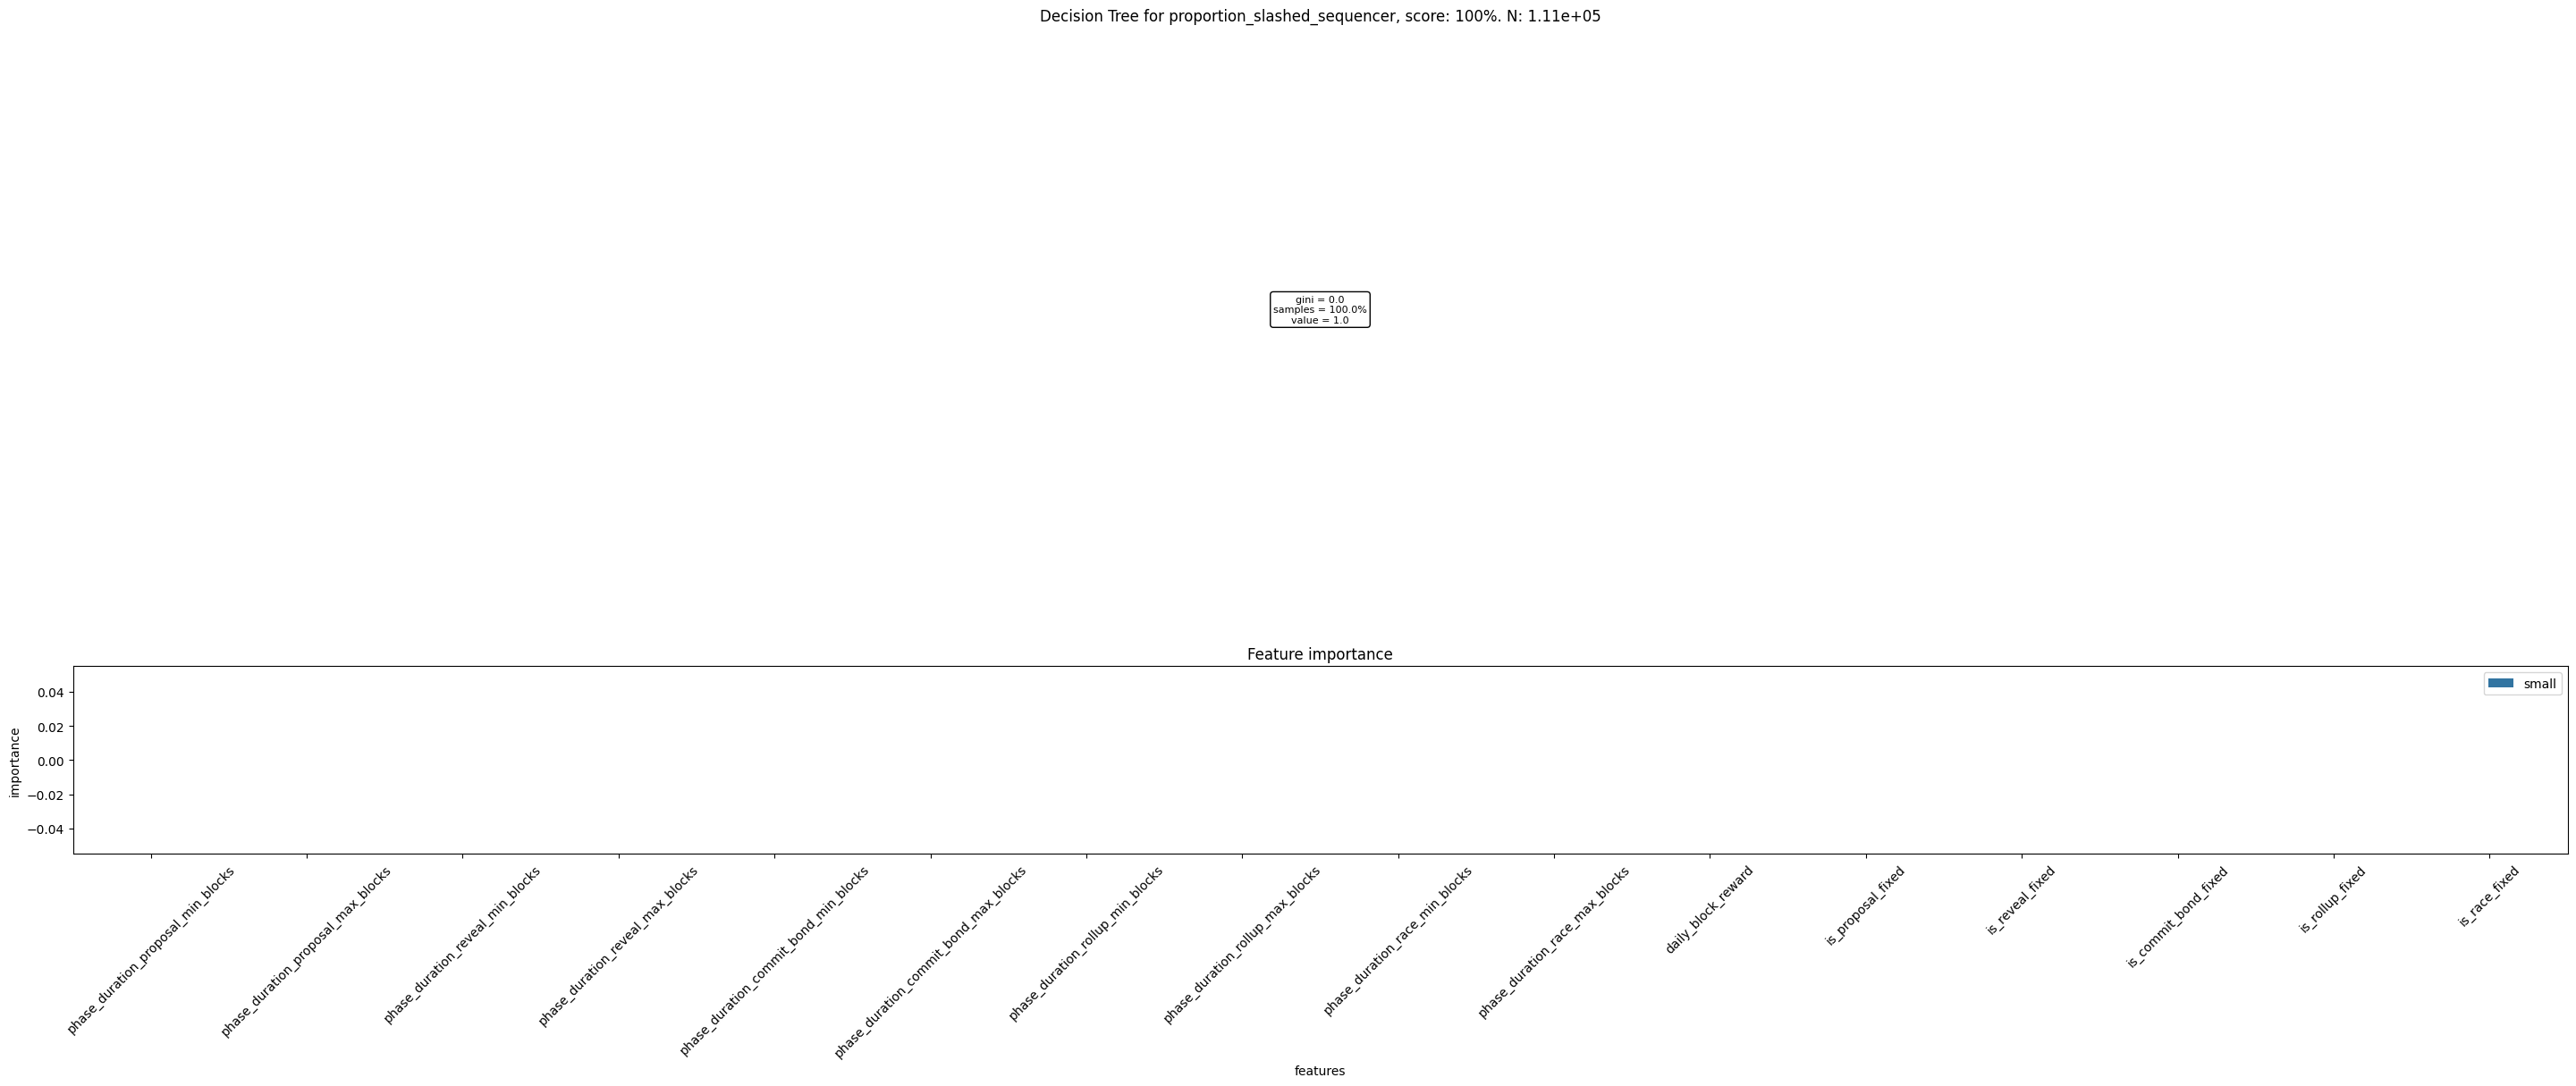

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_slashed_sequencer, score: 100%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_slashed_sequencer",
                                      success_criteria='lower_than_median')

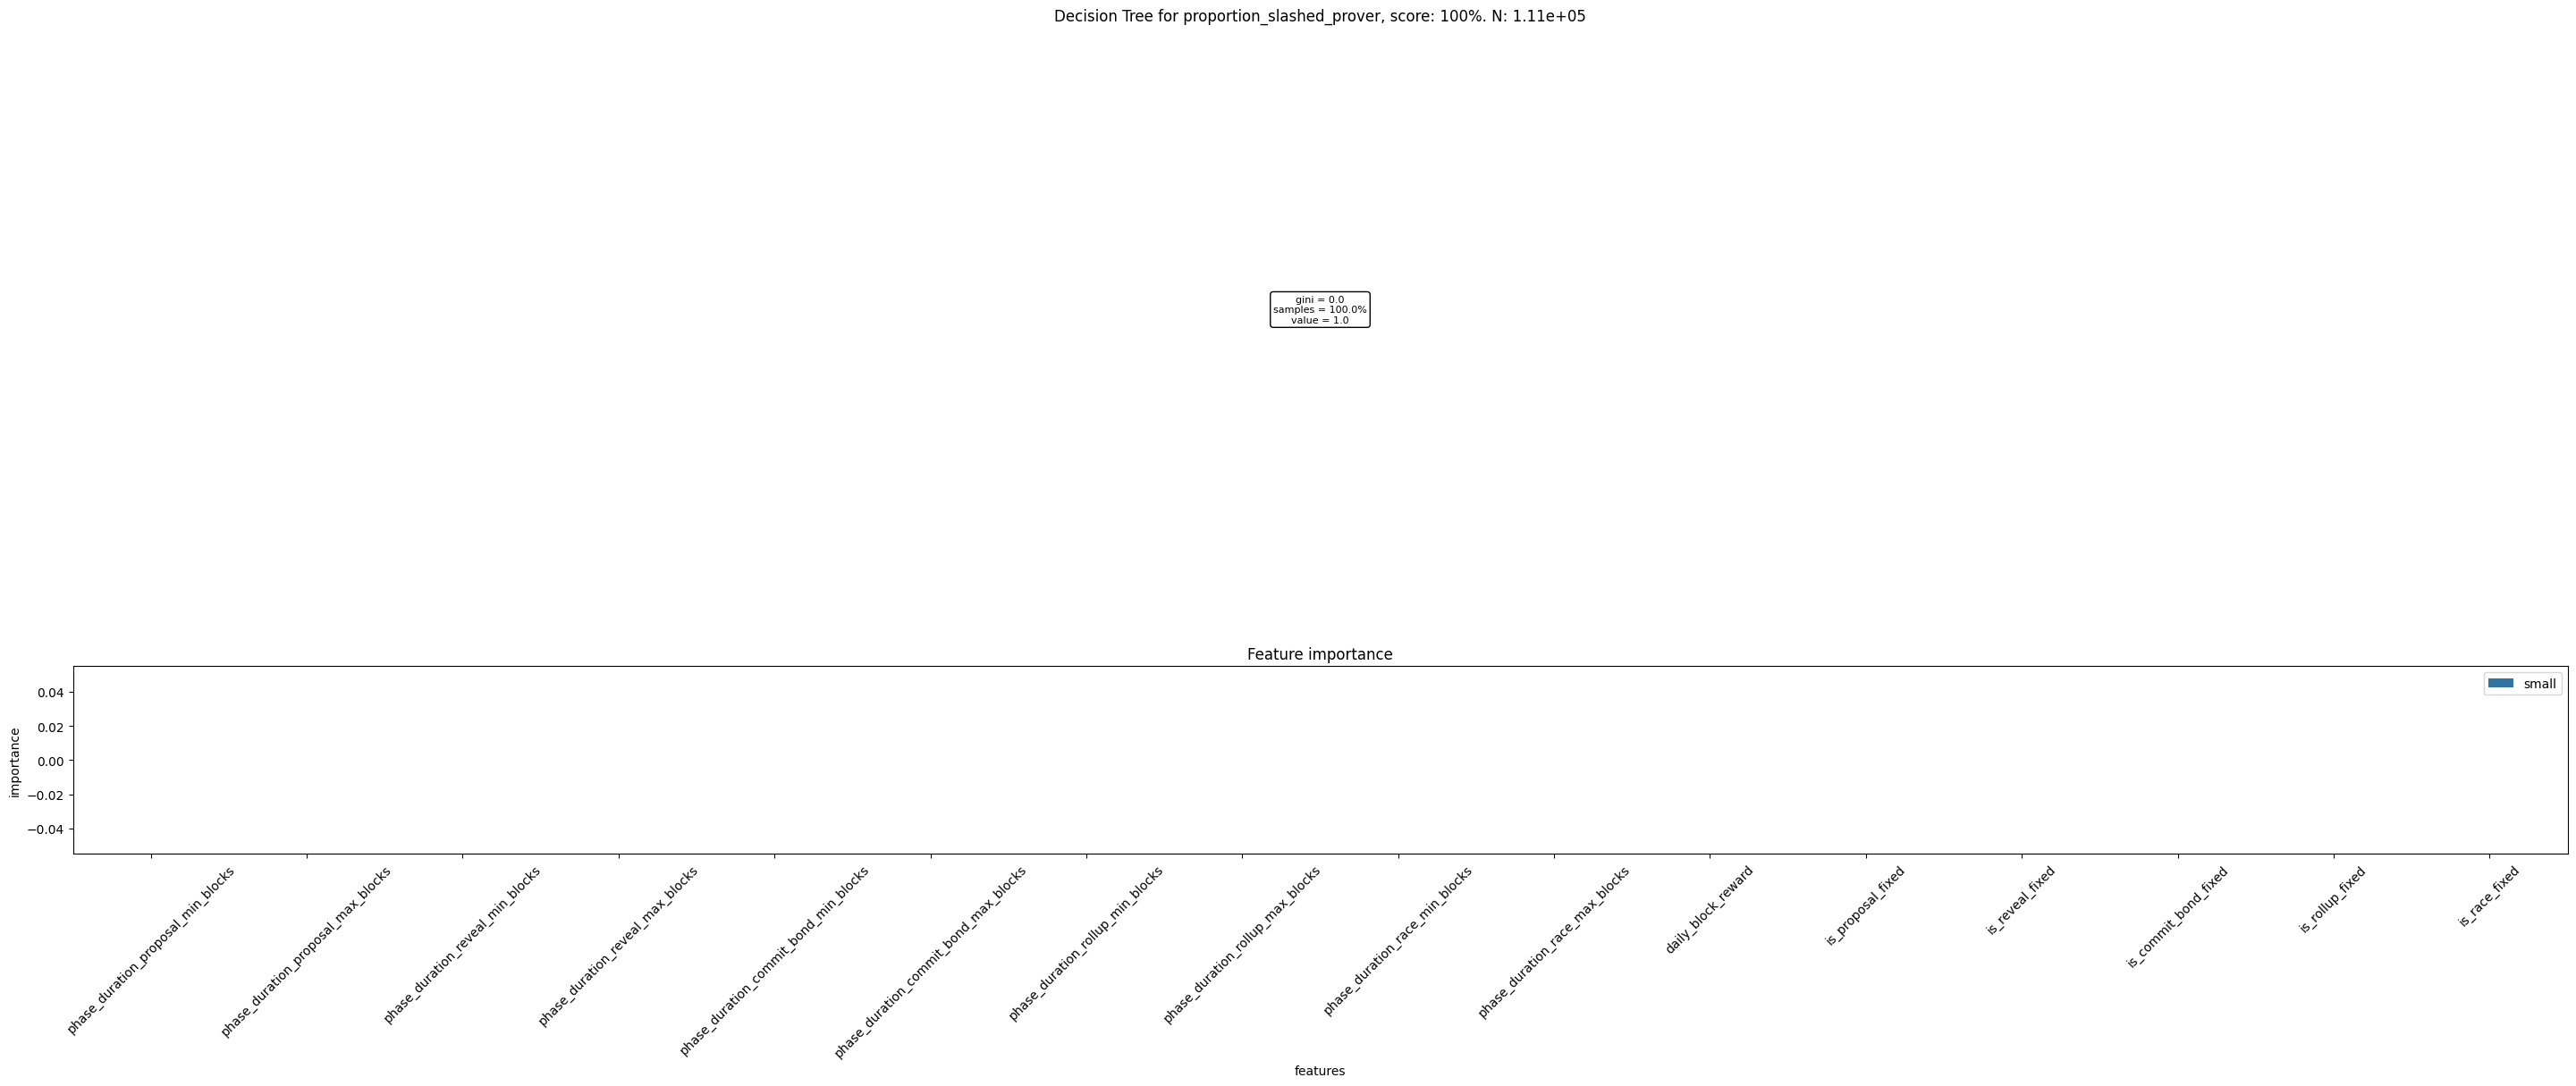

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_slashed_prover, score: 100%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_slashed_prover",
                                      success_criteria='lower_than_median')

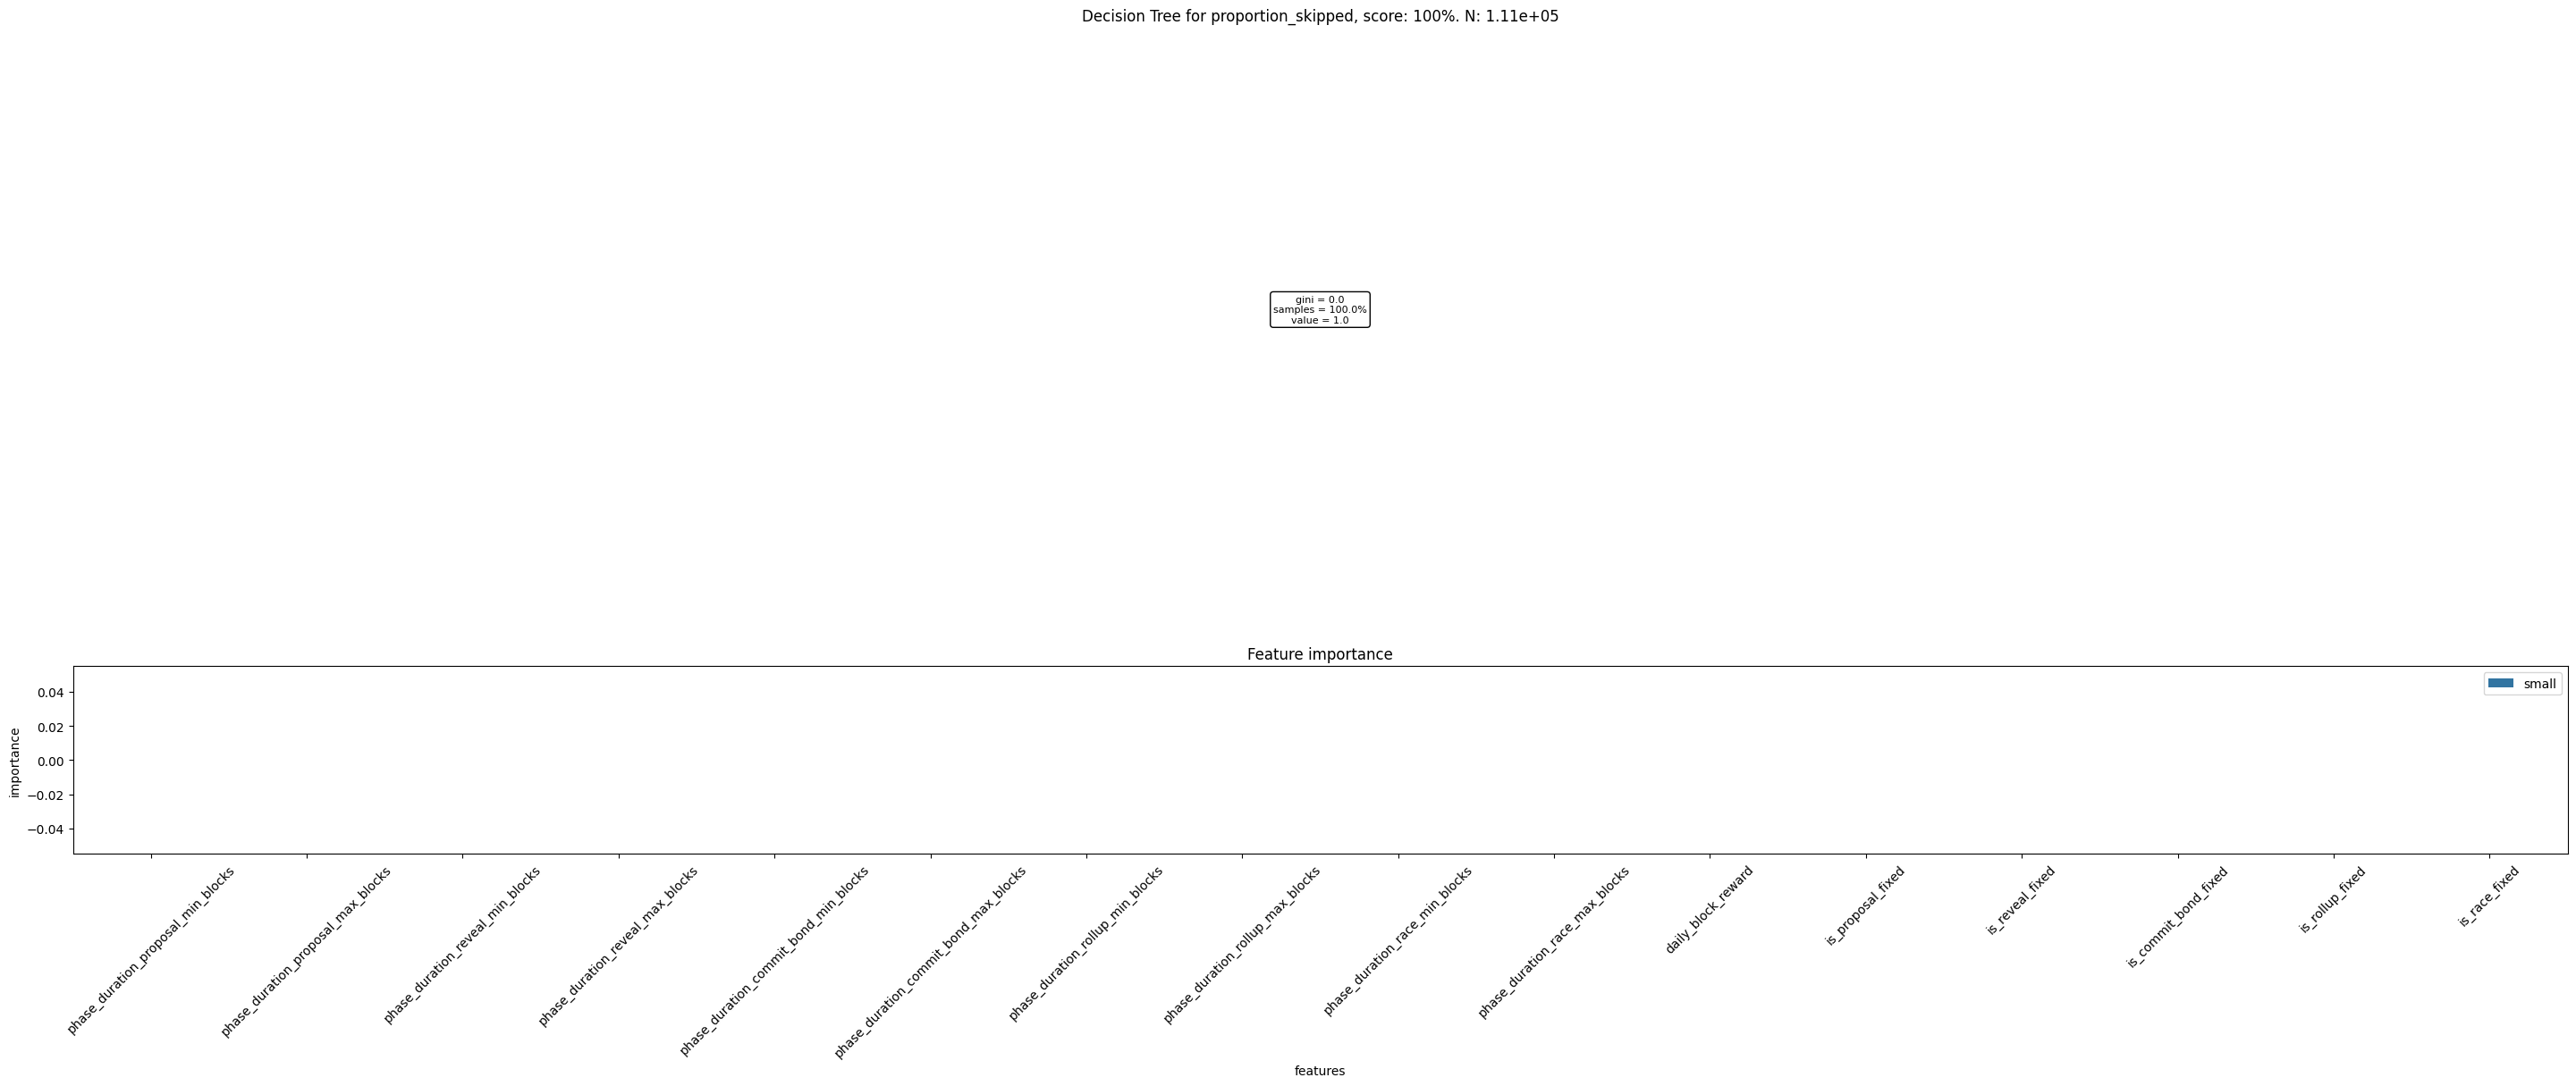

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_skipped, score: 100%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_skipped",
                                      success_criteria='lower_than_median')

## Group 2 Tree Importance Plots

In [ ]:
goal_number = "G2"
group_name = G2

final_G2_df = calculate_goal_score(grouped_df = base_df,
                    group = group_name,
                    new_column_name = f"{goal_number}_final_score" )

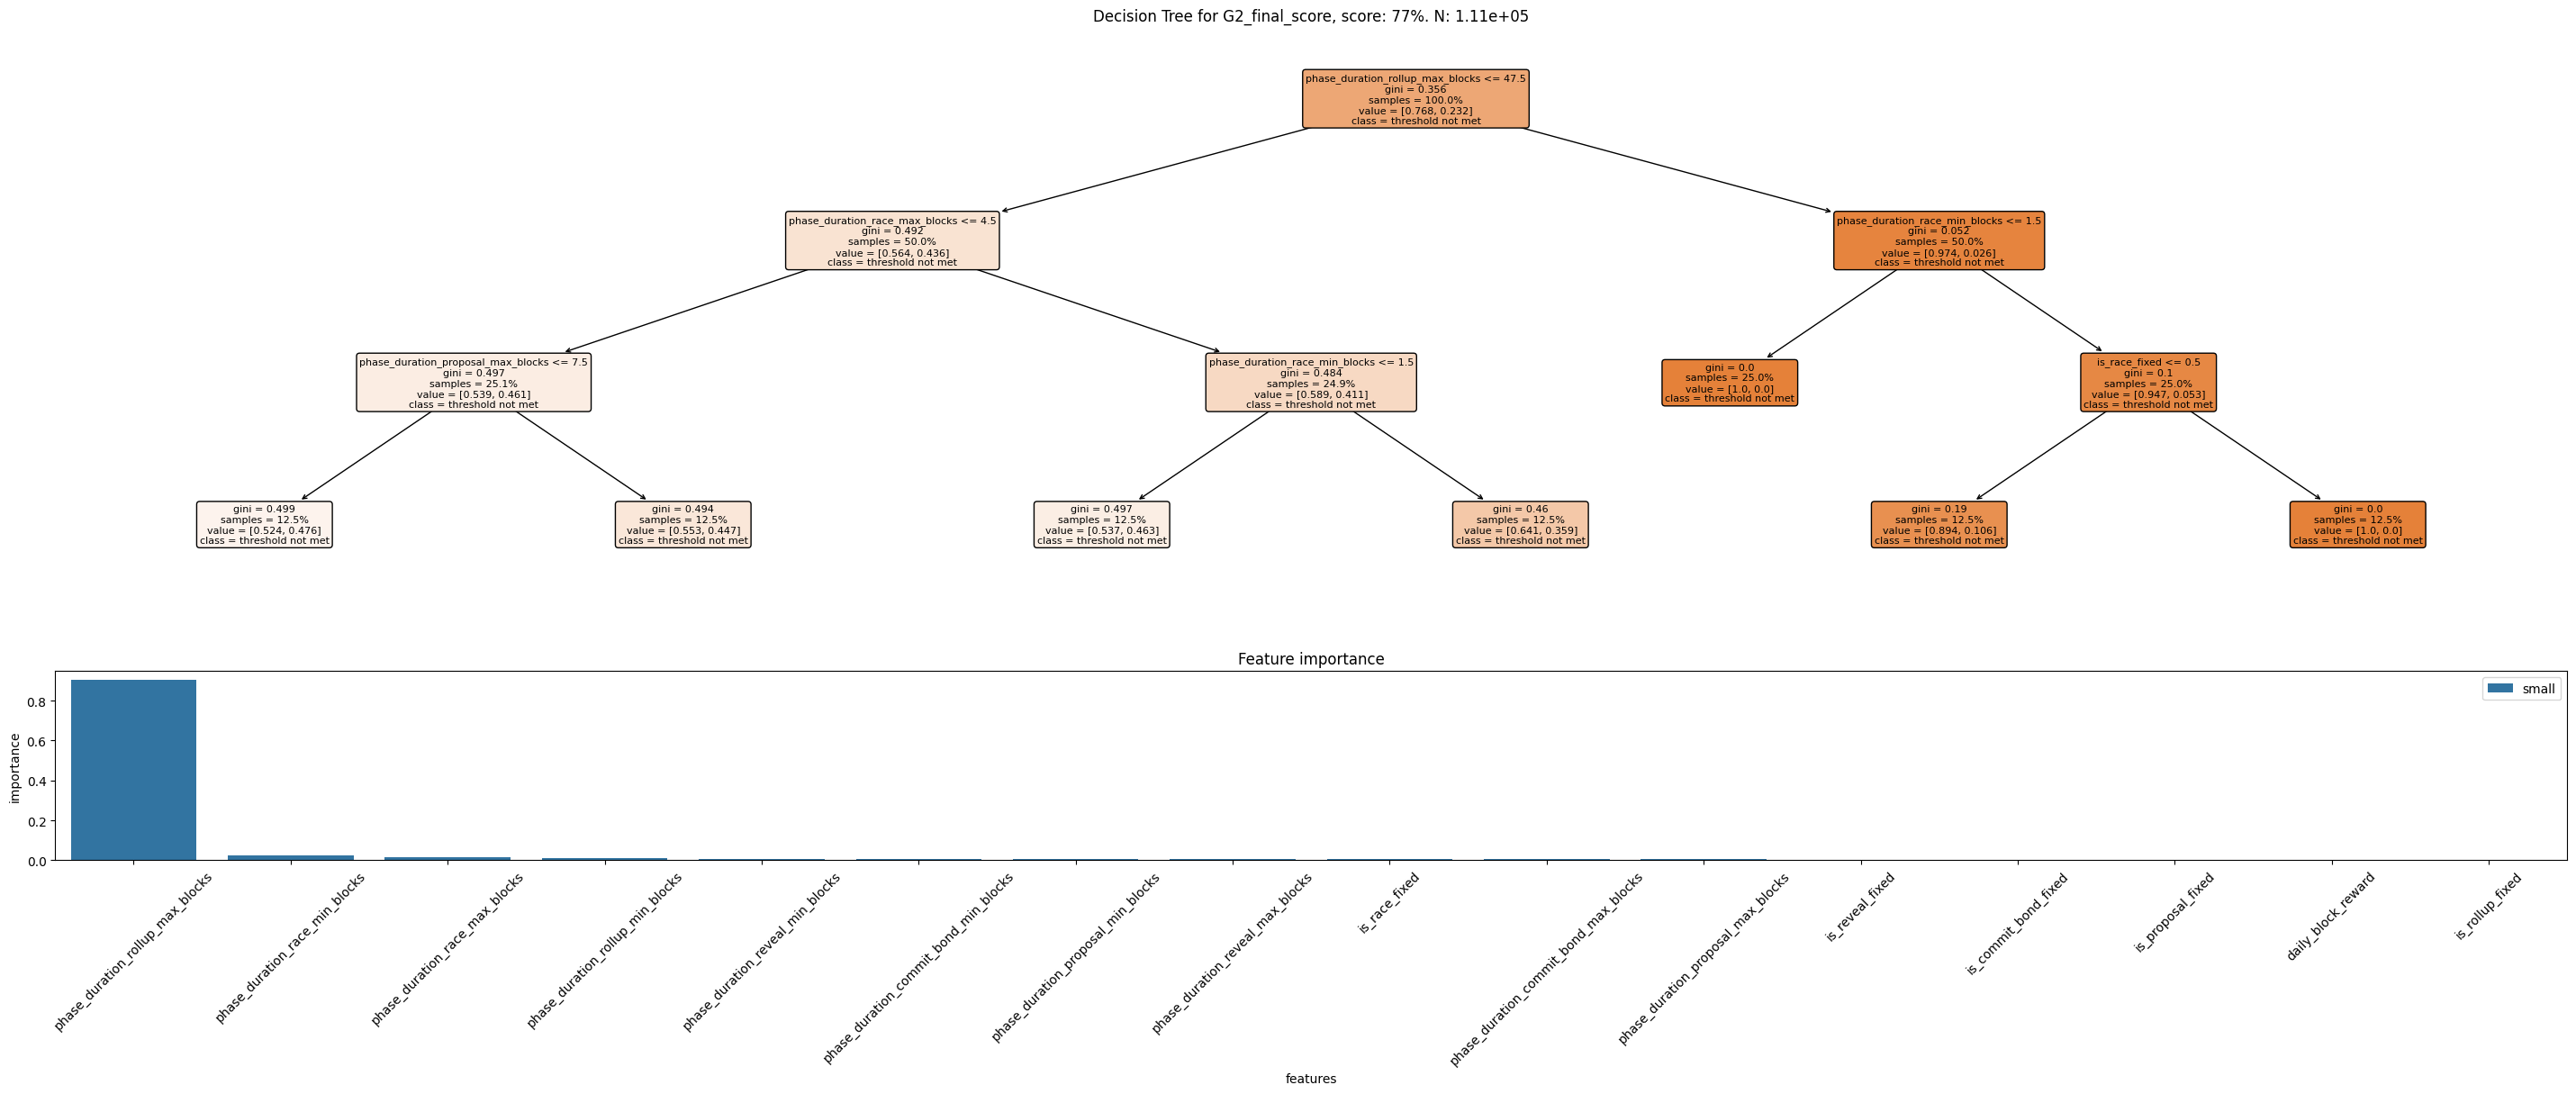

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for G2_final_score, score: 77%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G2_df, 
                                      col_name = "G2_final_score",
                                      success_criteria='higher_than_median')

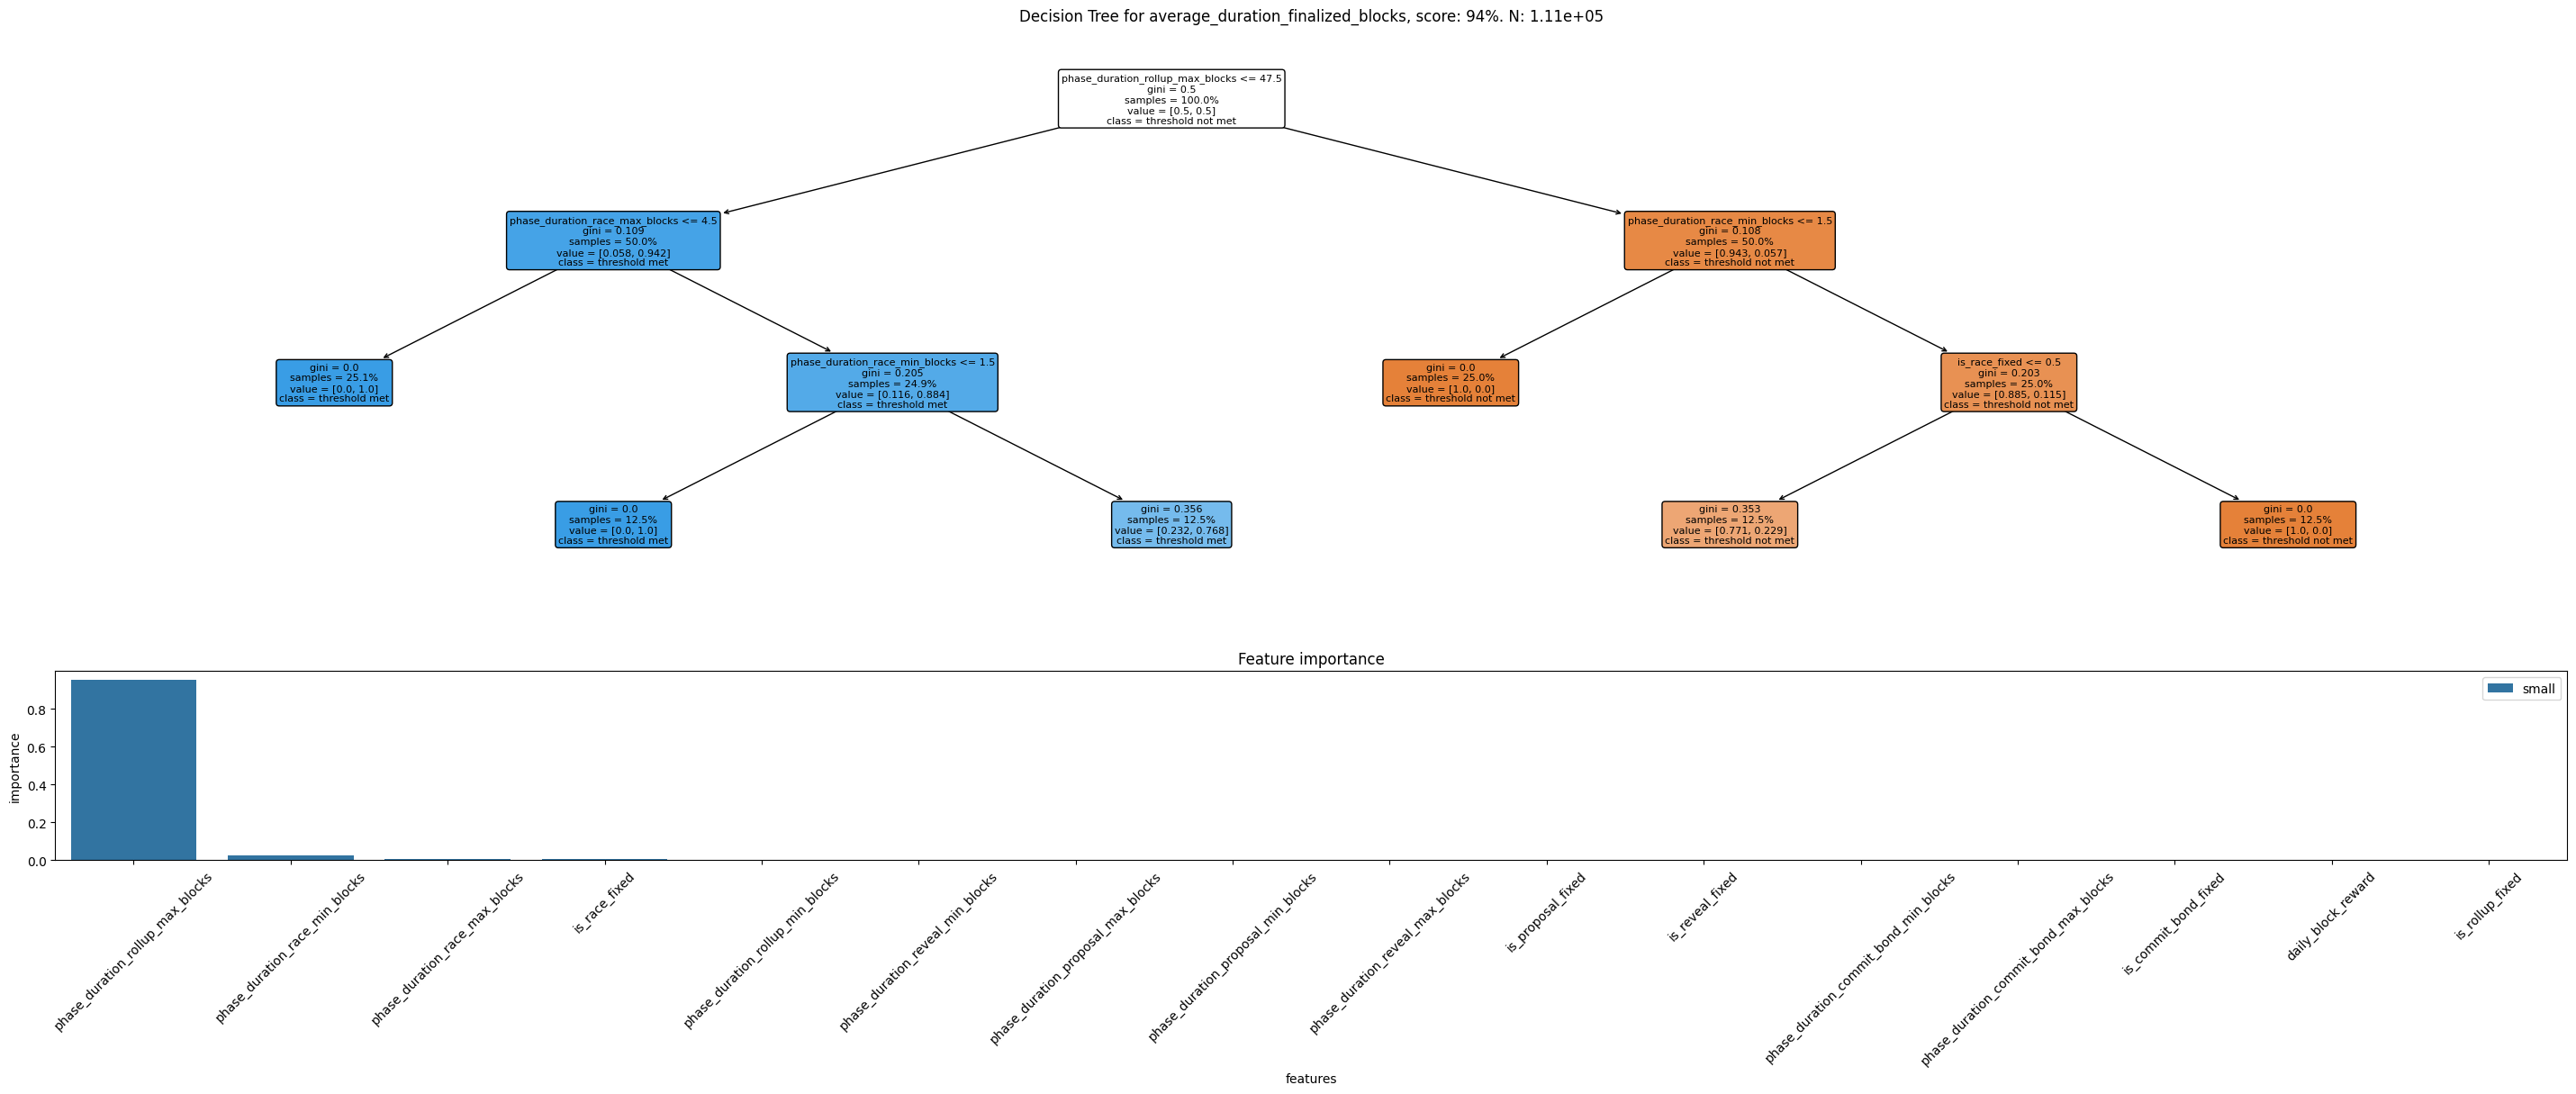

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for average_duration_finalized_blocks, score: 94%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "average_duration_finalized_blocks",
                                      success_criteria='lower_than_median')

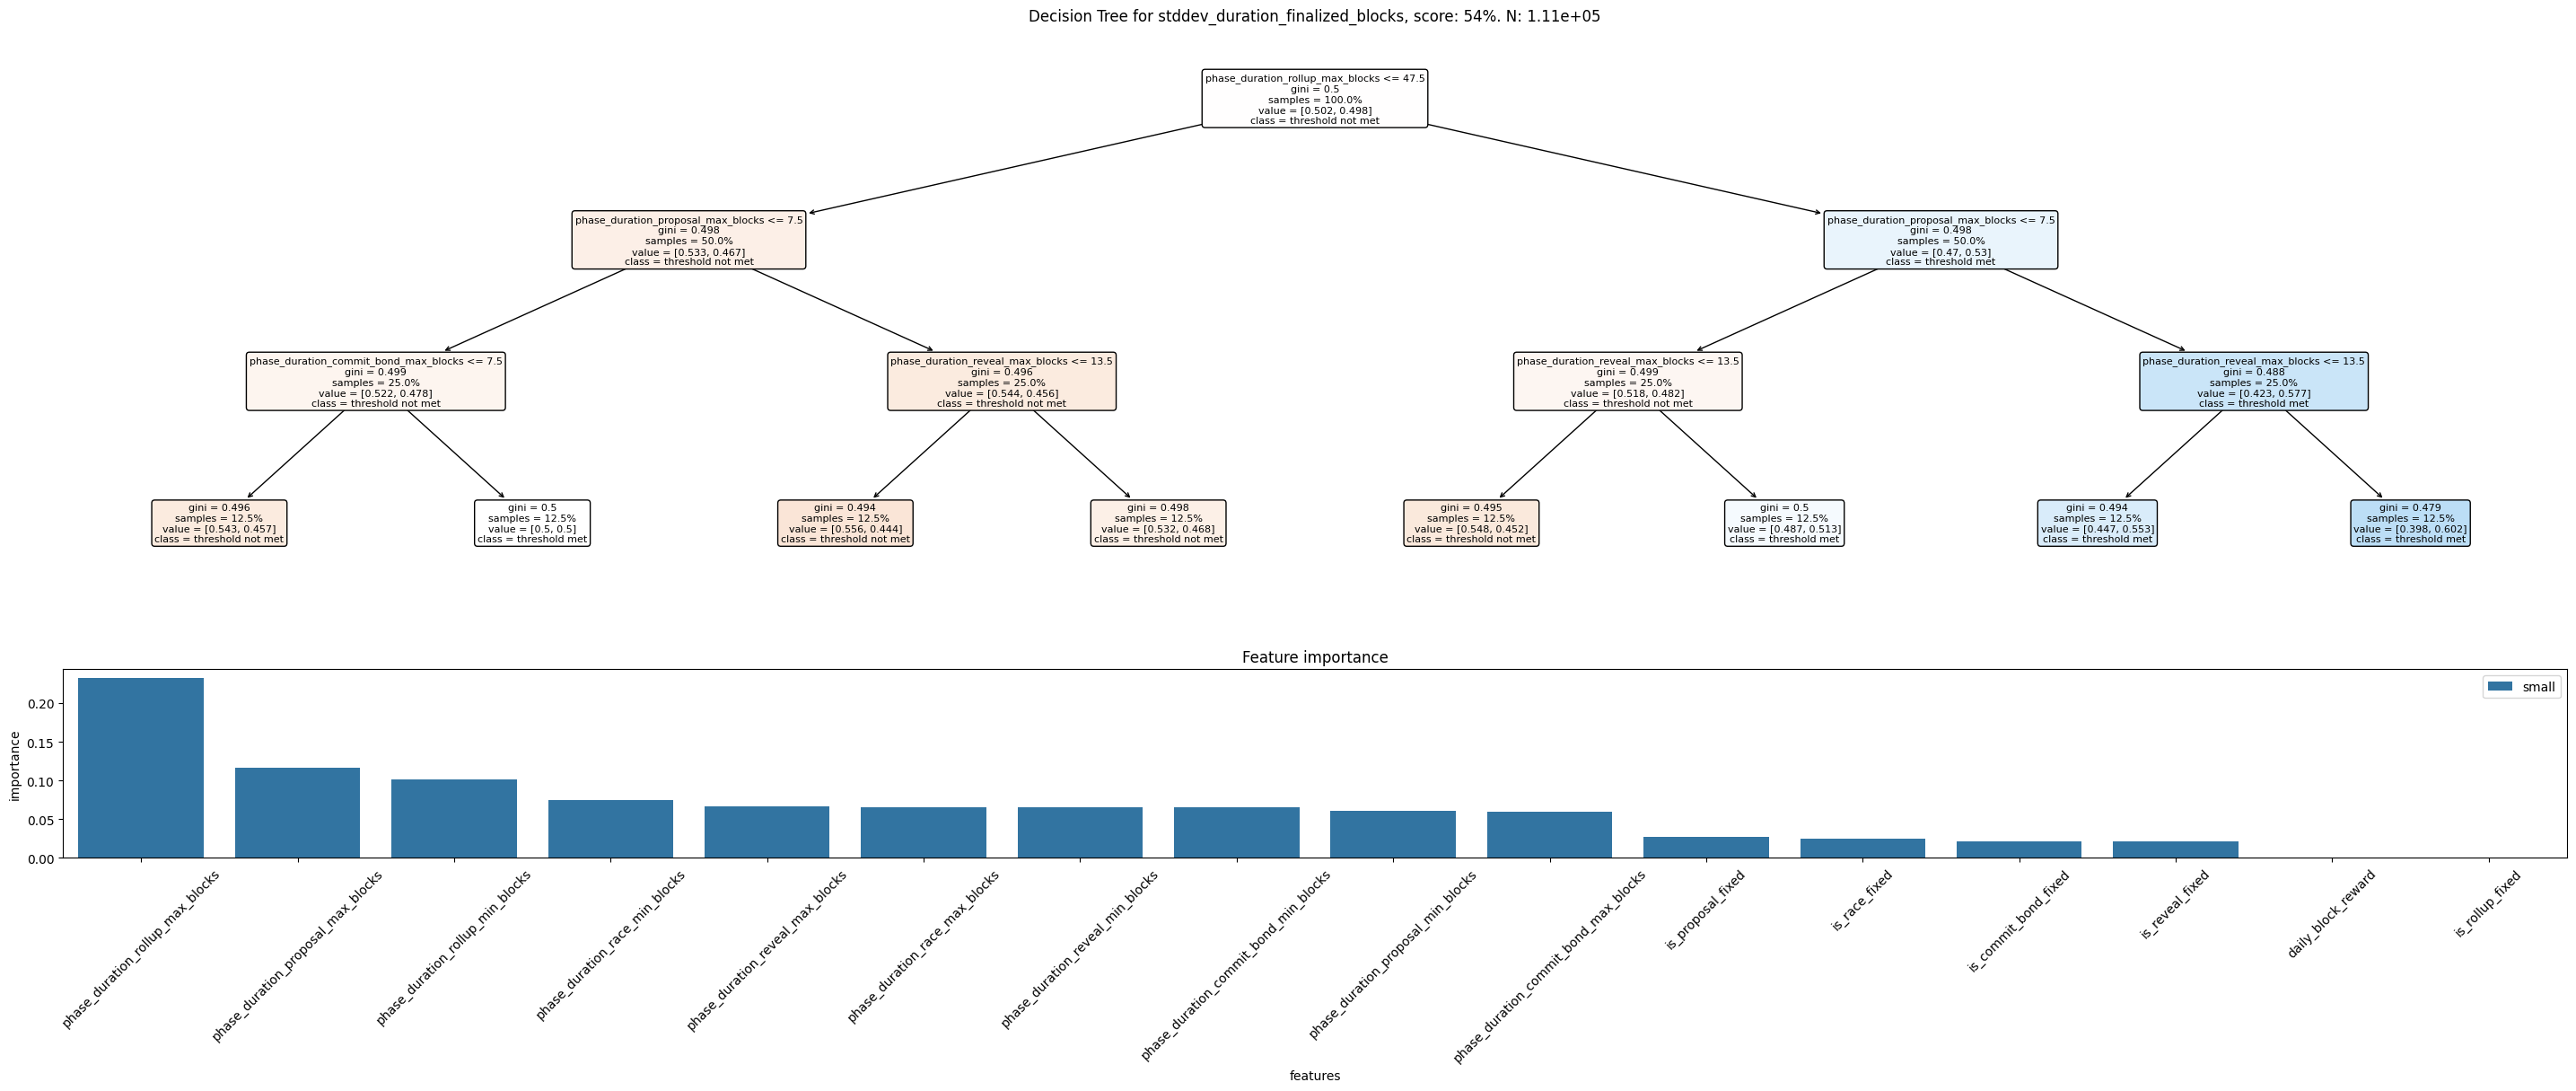

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for stddev_duration_finalized_blocks, score: 54%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "stddev_duration_finalized_blocks",
                                      success_criteria='lower_than_median')

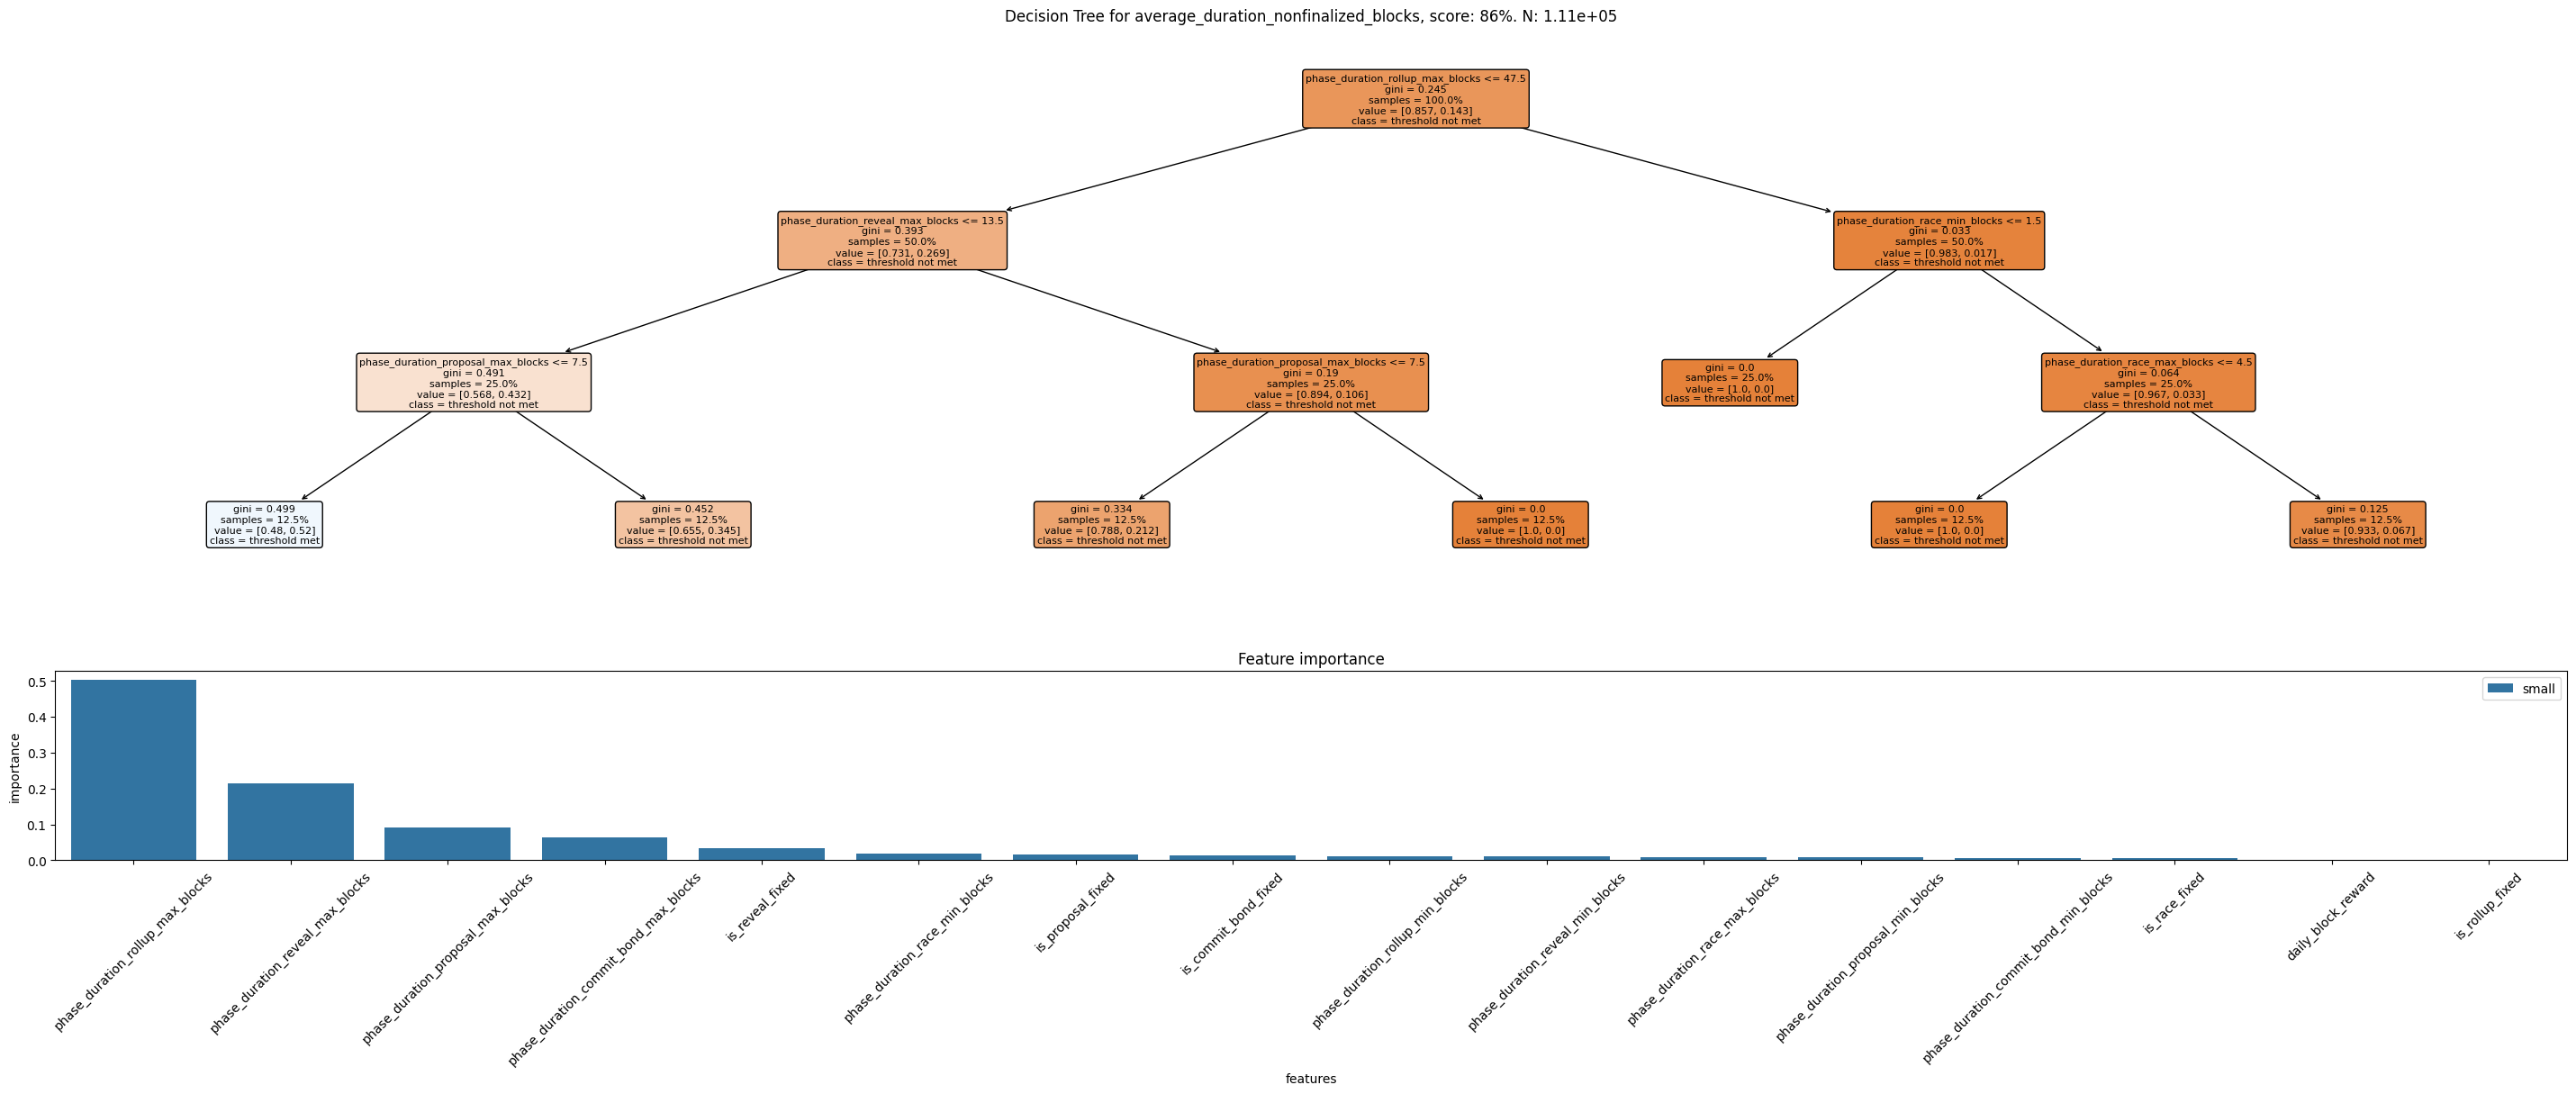

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for average_duration_nonfinalized_blocks, score: 86%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "average_duration_nonfinalized_blocks",
                                      success_criteria='lower_than_median')

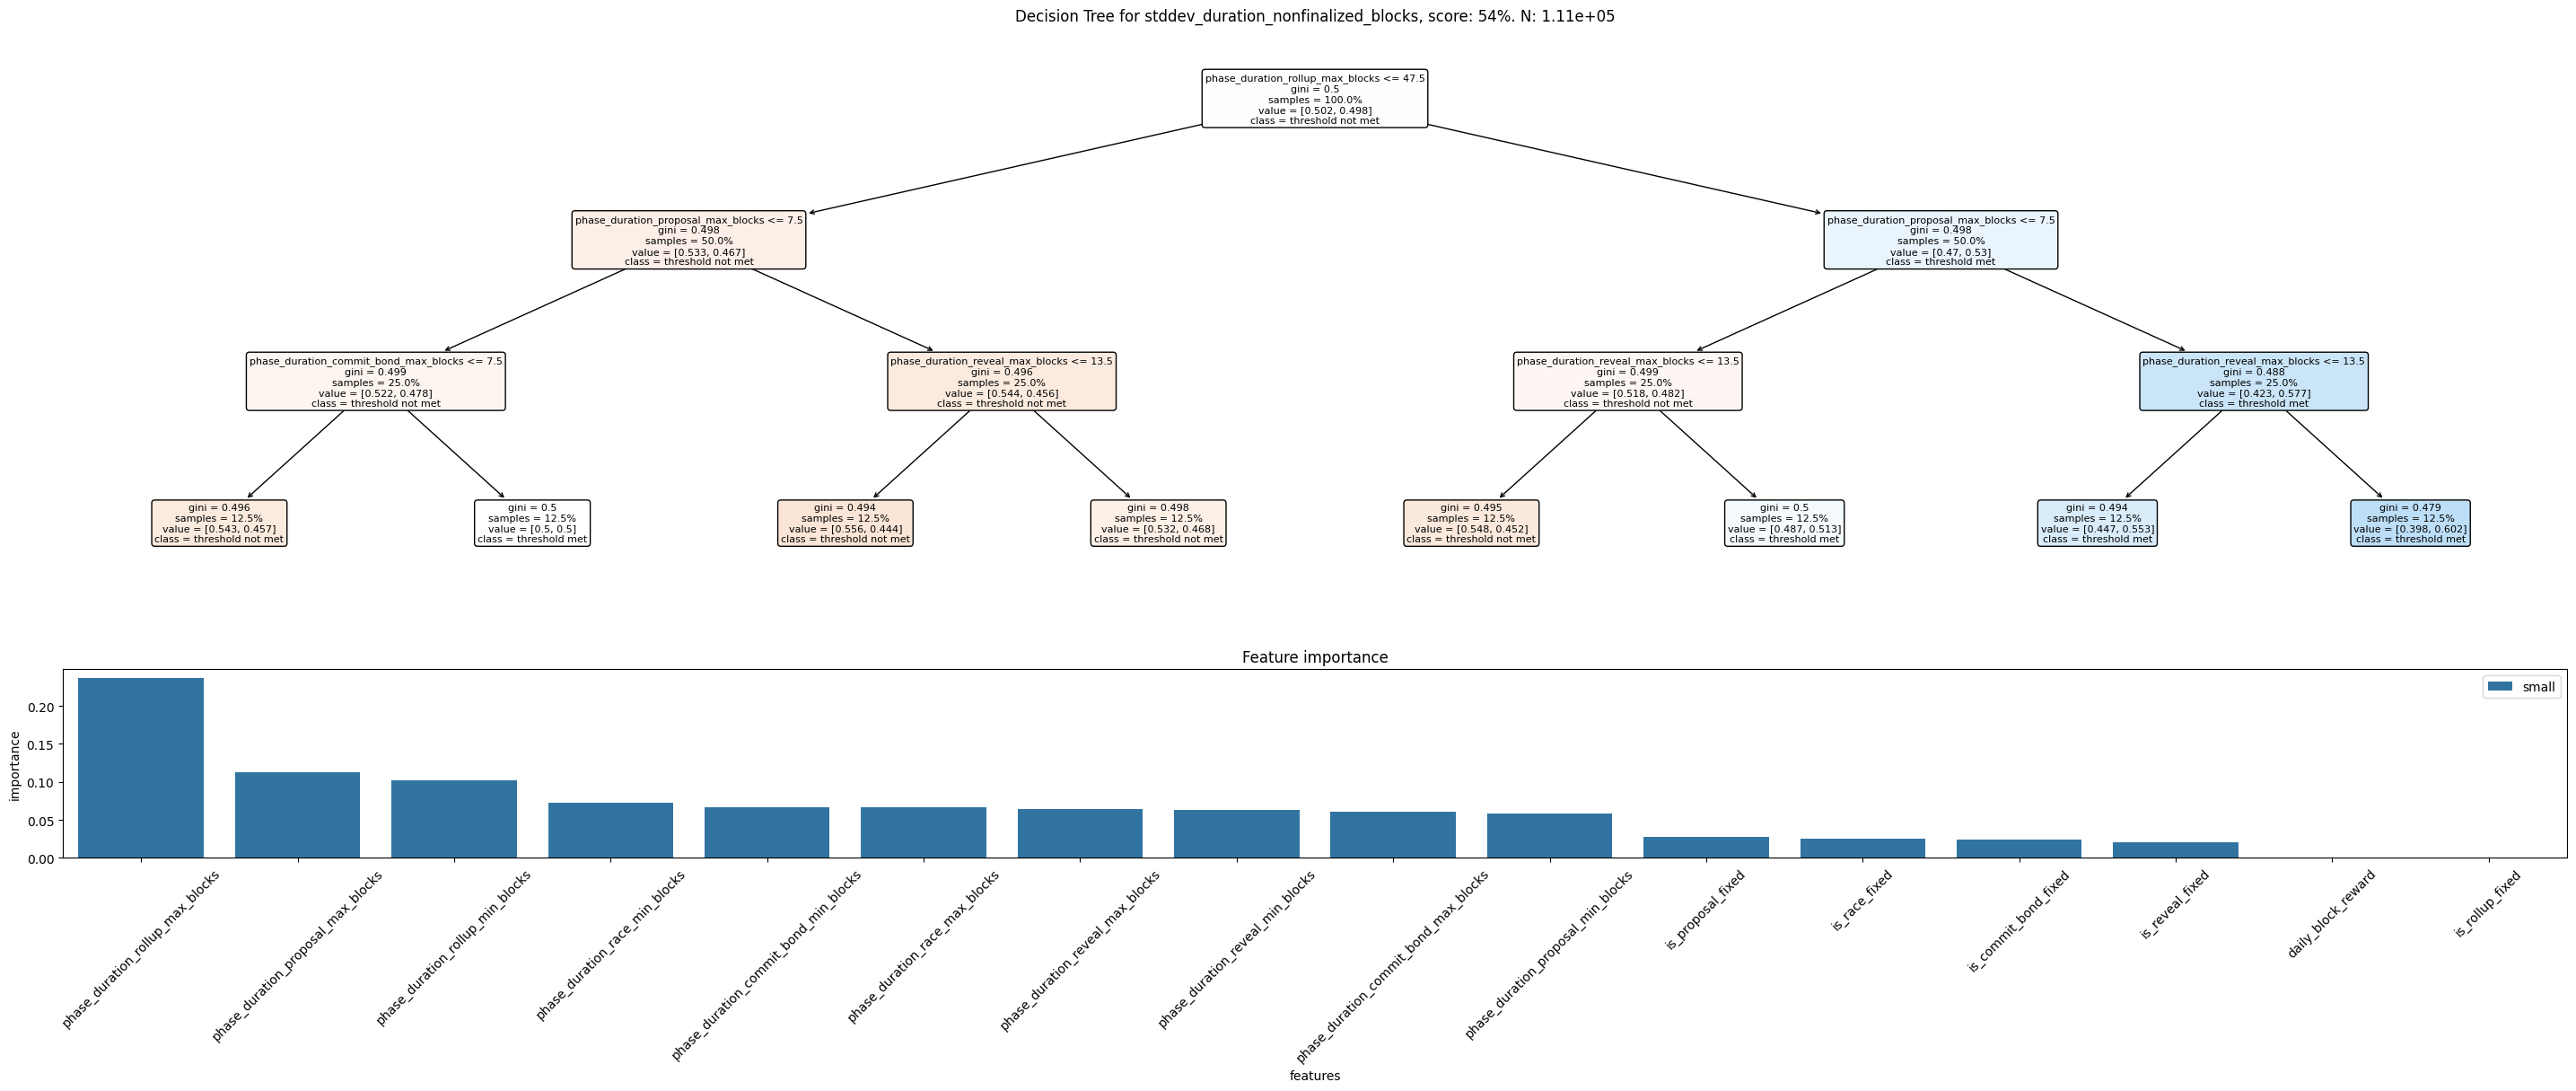

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for stddev_duration_nonfinalized_blocks, score: 54%. N: 1.11e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [ ]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "stddev_duration_nonfinalized_blocks",
                                      success_criteria='lower_than_median')

# Parameter Impact on KPIs

The simulation results provide, for each combination of swept protocol parameter values ("parameter constellations"), a series of outcomes distinguished by different random realizations of stochastic ("Monte Carlo") distributions. Thus, each of the KPIs can be computed for each simulation result, and a _frequency distribution_ or _density_ of KPI values can be generated for each of the iterations of the adaptive grid approach. These densities can be further broken down by protocol parameter value, and the changes in the densities across different values can be visualized. This provides a method of assessing the sensitivity of the KPIs to the protocol parameters, both at the initial adaptive grid implementation, before optimization is performed, and at the end of the implementation, when the recommended parameter ranges have been achieved.

**Per Figure:** 
Each image below shows estimated Kernel Density Estimator (KDE) plots for different parameter values. A KDE fits a probability distribution curve to an underlying histogram of the data distribution, similar to how a regression line is fitted to points on a scatterplot.

The x-axis gives values of the KPI, while the y-axis corresponds to the proportion of simulations giving that KPI value. Generally, there will be two curves, with each curve corresponding to the value of a parameter being swept. Looking at qualitative differences between the two curves gives a visual estimate of parameter impact, useful both for complementing the Decision Tree plot analysis and for suggesting places where further data analysis would be valuable.

One general guideline is to look at the number, location, and height of each curve's peaks. If the two curves are essentially identical (sometimes indicated by only one curve being visible as they completely overlap), this is a likely indication that changing the parameter value had no impact on this particular KPI. If the two curves have notable differences, this is an indicator that there are differences in the simulation data produced by the two KPI values. There can be many reasons for these differences, so further analysis into the underlying simulation data would be warranted.

**Per Group of Figures:** 
Each group of figures below corresponds to one of the protocol parameters. Each row in a figure group corresponds to a different KPI, and each column to the initial adaptive grid and final adaptive grid simulation results. Within a figure, the density corresponding to each swept value of the associated protocol parameter is presented (generally, the lower sweep value is displayed in black, while the upper sweep value is in red, although this may not always be the case). 

By examining the changes in the shape of the KPI densities across sweep values and across the adaptive grid results, a qualitative visual assessment of how sensitive the KPI under scrutiny is to the swept protocol parameter can be made.

## Parameter Impact Plots, Group 1

### Impact of Parameter Values on `proportion_race_mode` and `proportion_skipped`

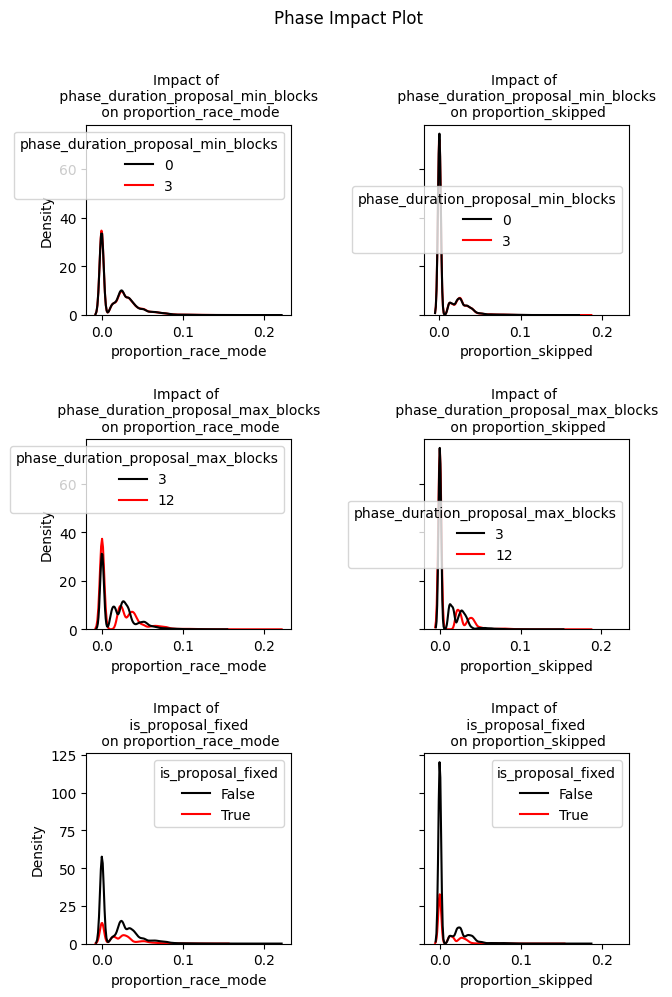

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])


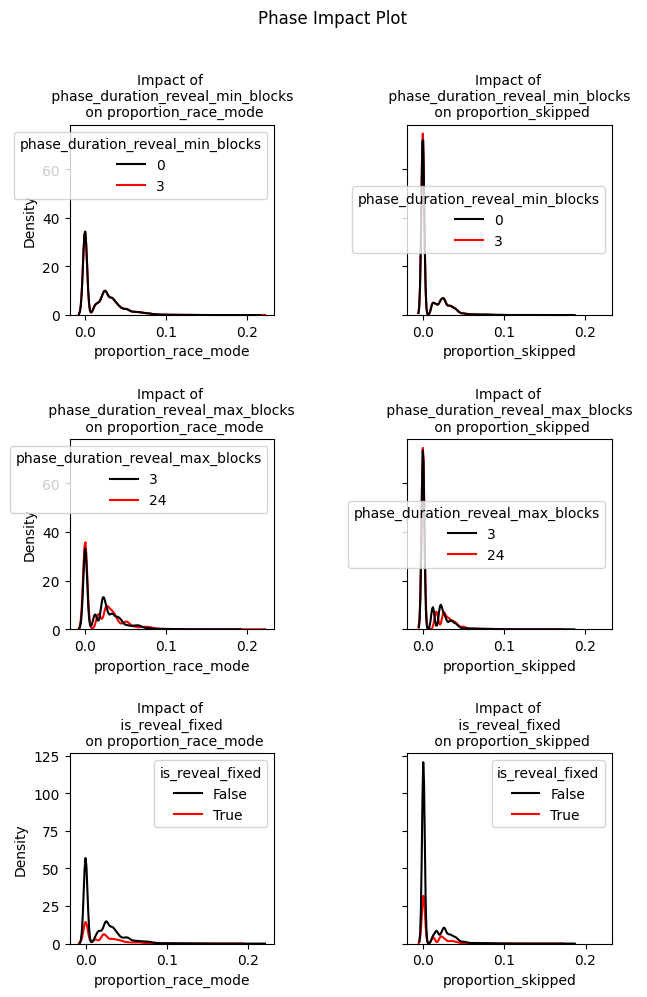

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

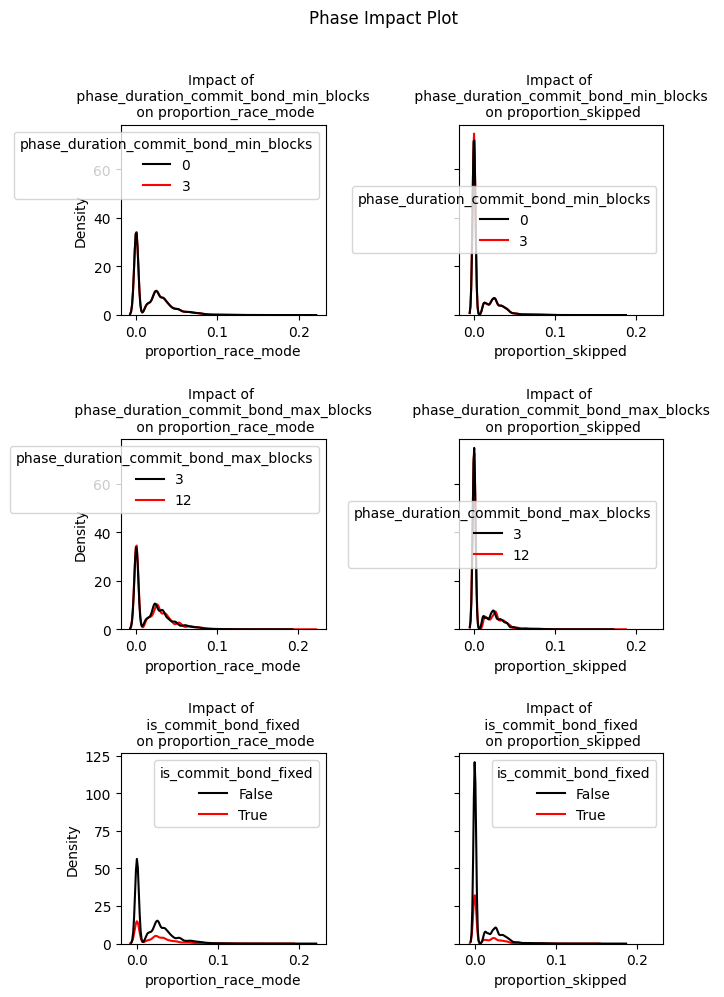

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=ob

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


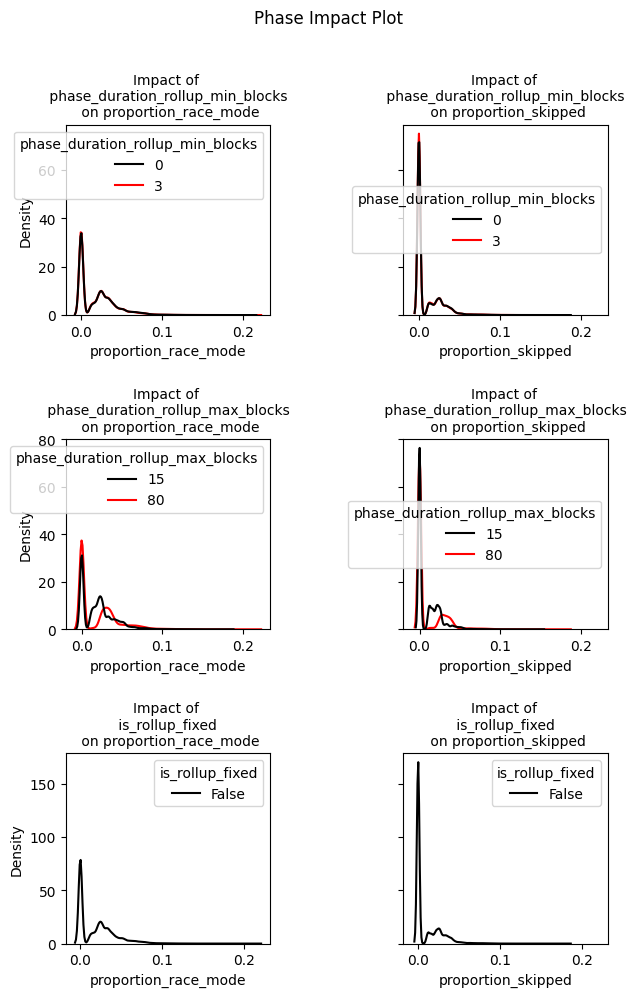

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

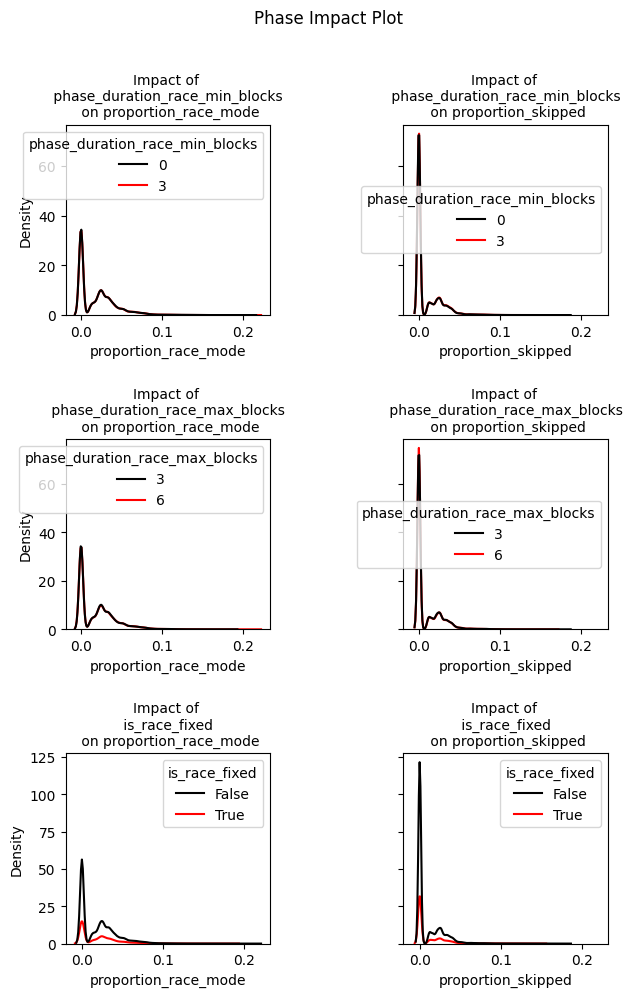

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

### Impact of Parameter Values on `proportion_slashed_prover` and `proportion_slashed_sequencer`

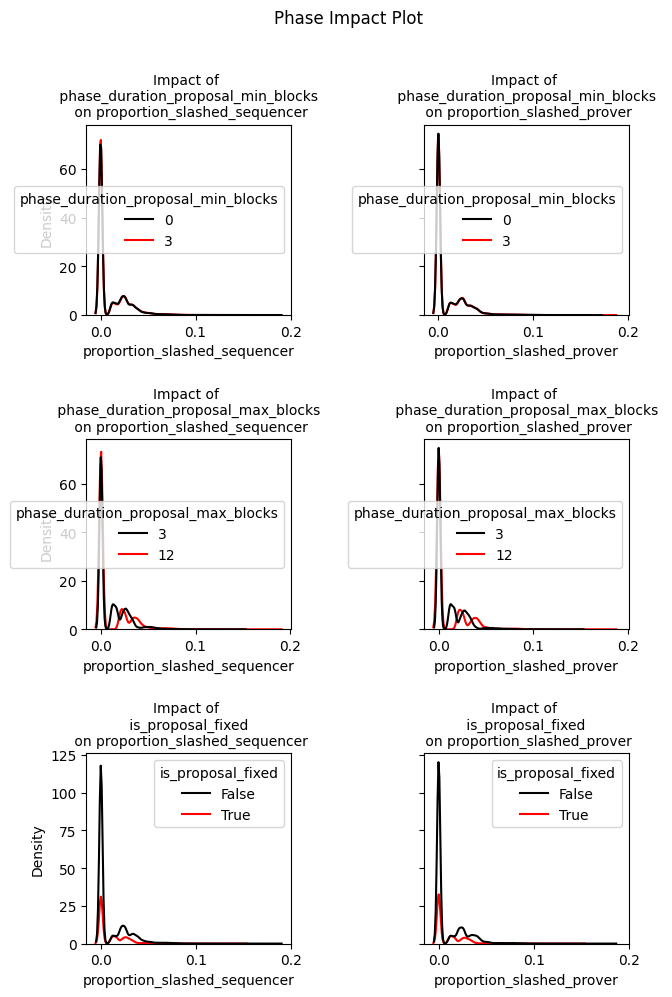

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_slashed_prover'}, 

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

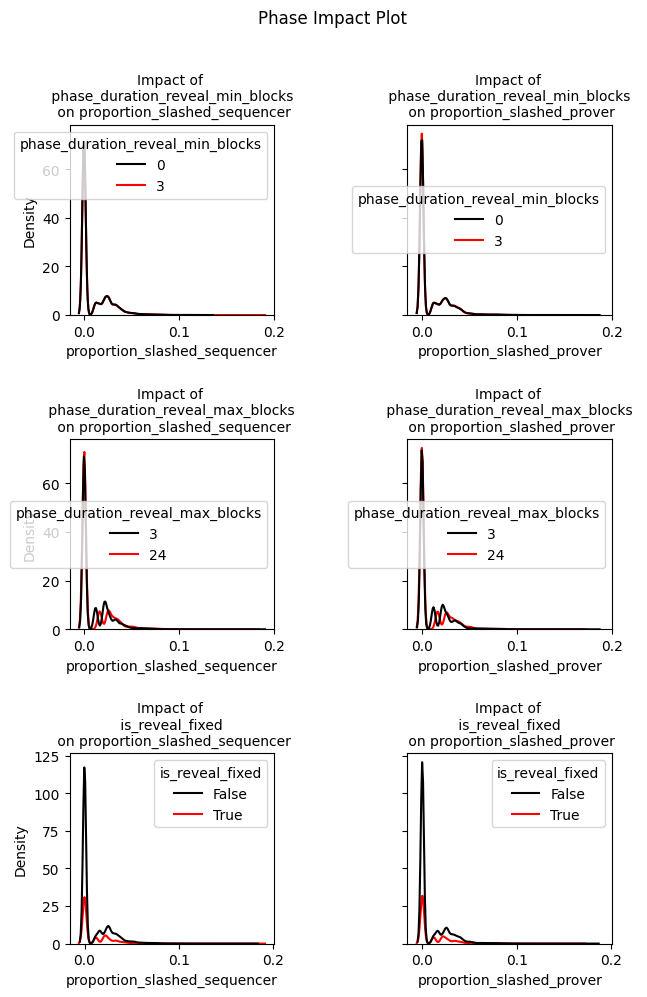

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_slashed_prover'}, xlabel='prop

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

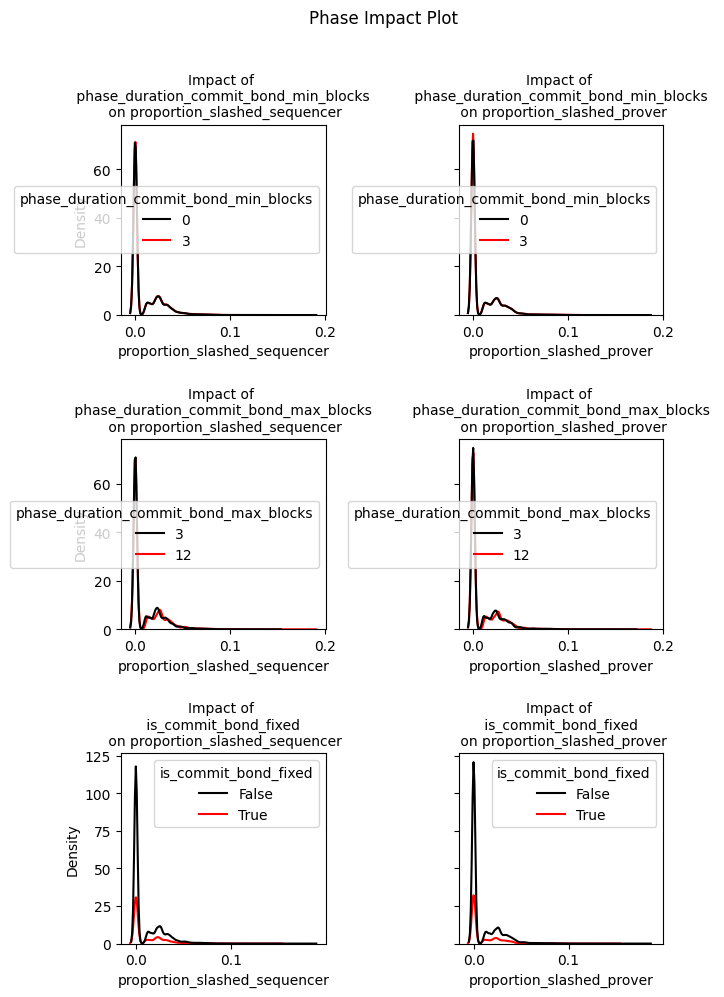

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


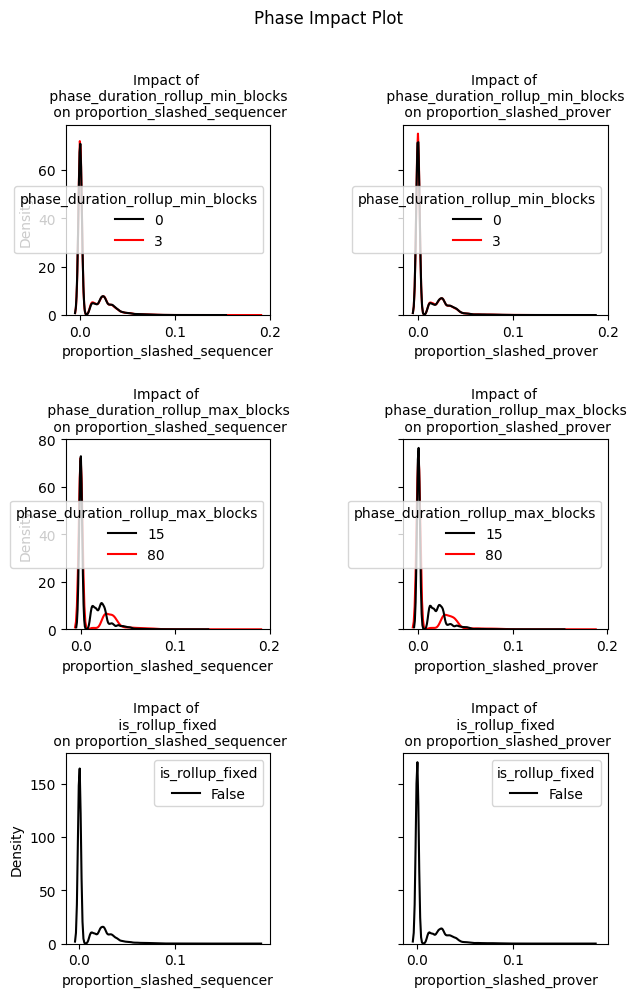

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_slashed_prover'}, xlabel='prop

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

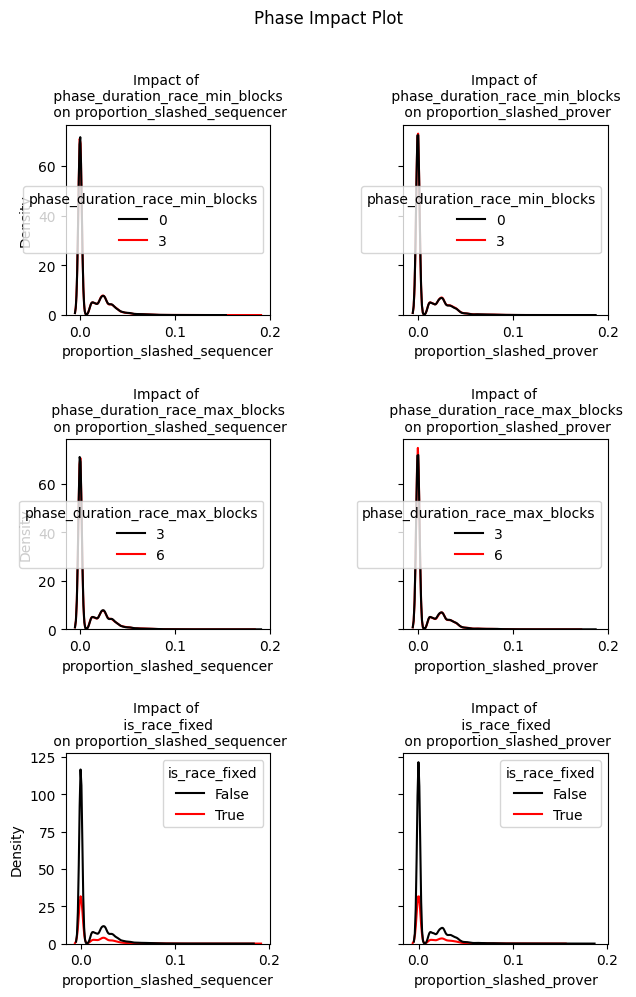

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_slashed_prover'}, xlabel='proportion_slash

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

## Parameter Impact Plots, Group 2

### Impact of Parameter Values on `average_duration_finalized_blocks` and `stddev_duration_finalized_blocks`

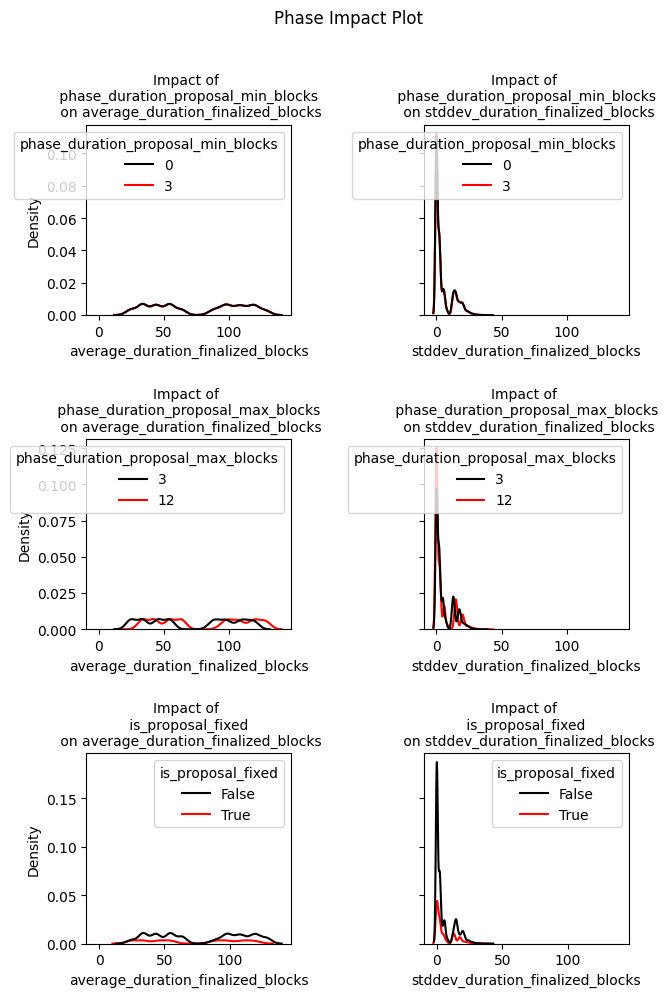

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact o

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

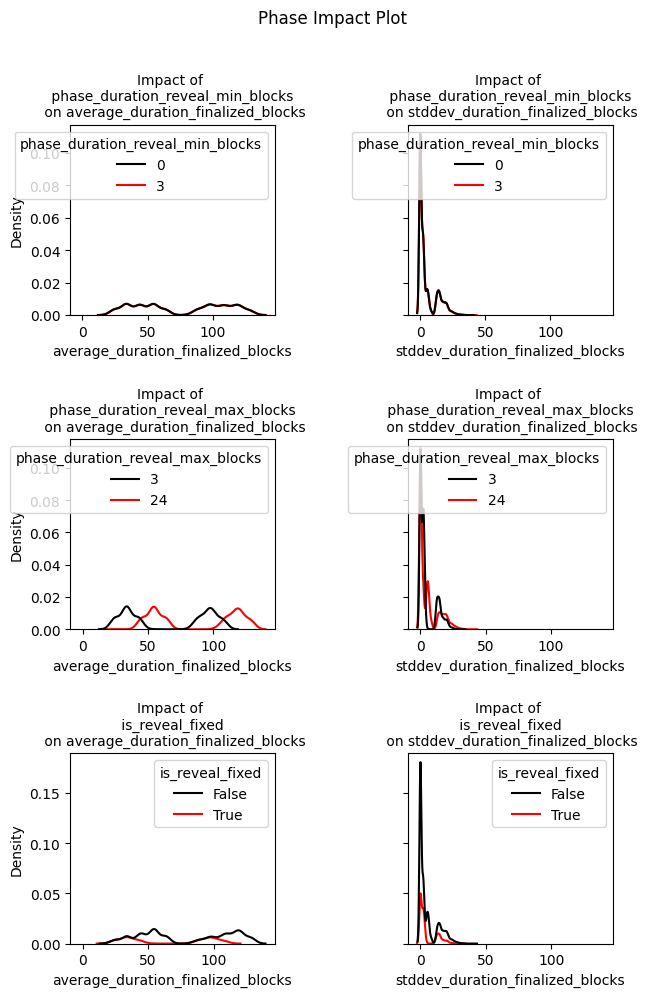

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_re

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

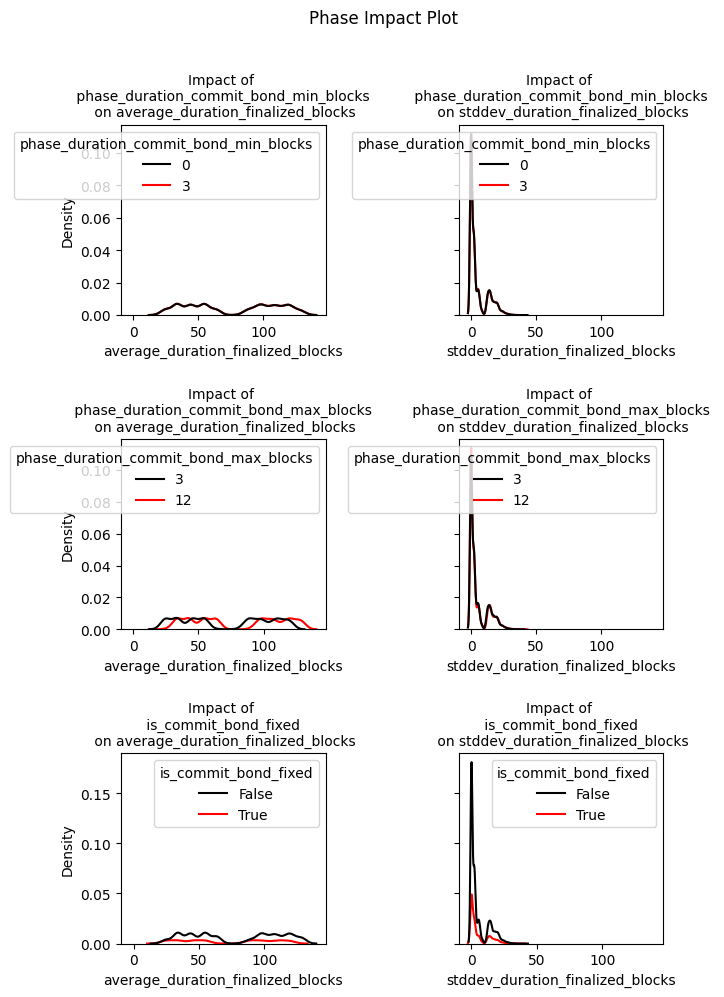

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'cen

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


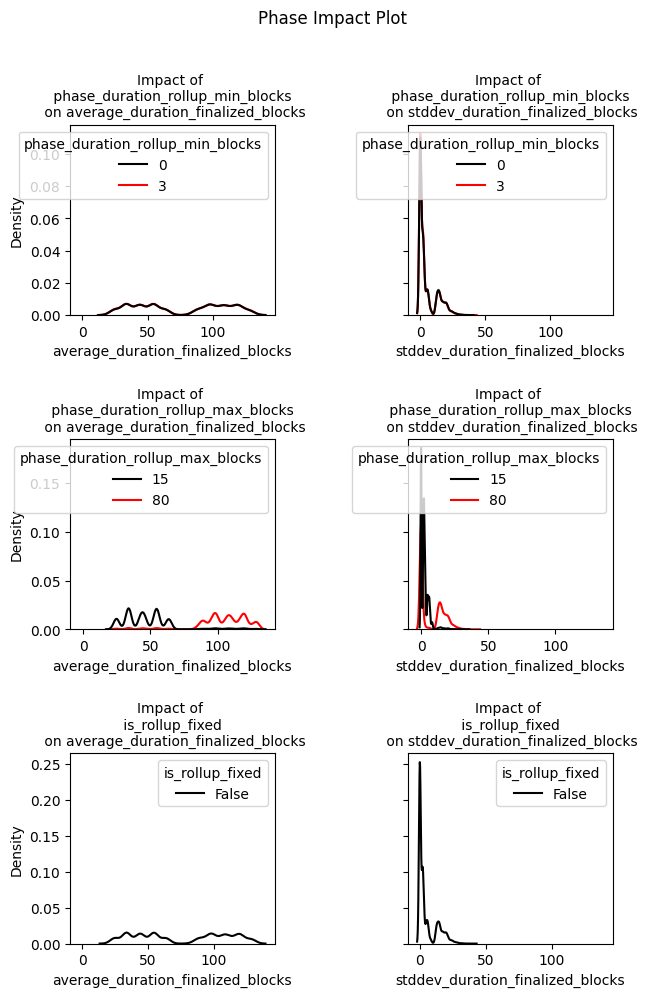

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_ro

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

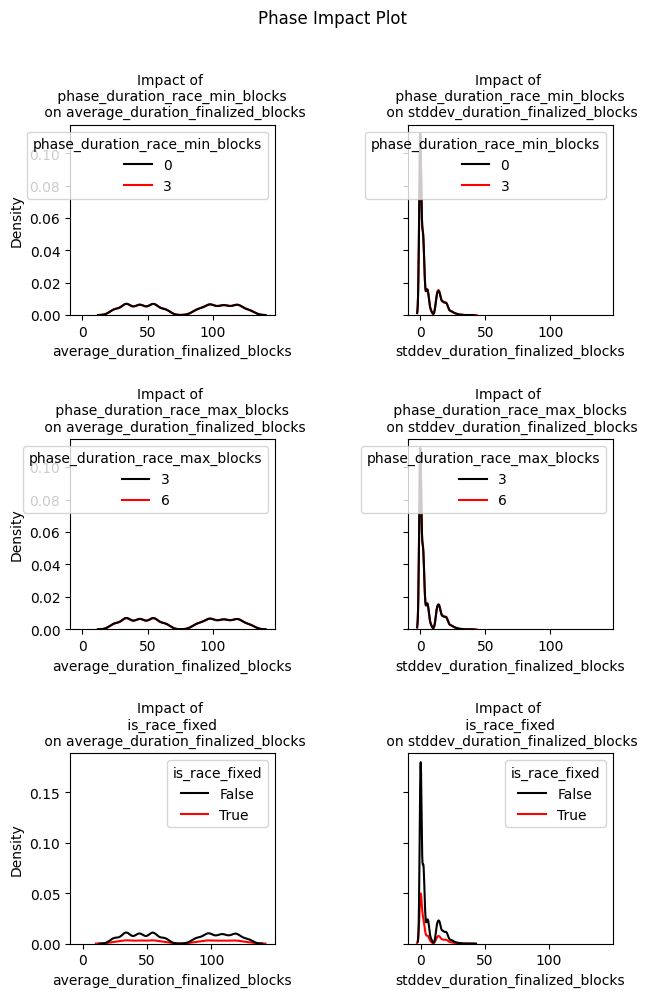

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_race_fixed \

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

### Impact of Parameter Values on `average_duration_nonfinalized_blocks` and `stddev_duration_nonfinalized_blocks`

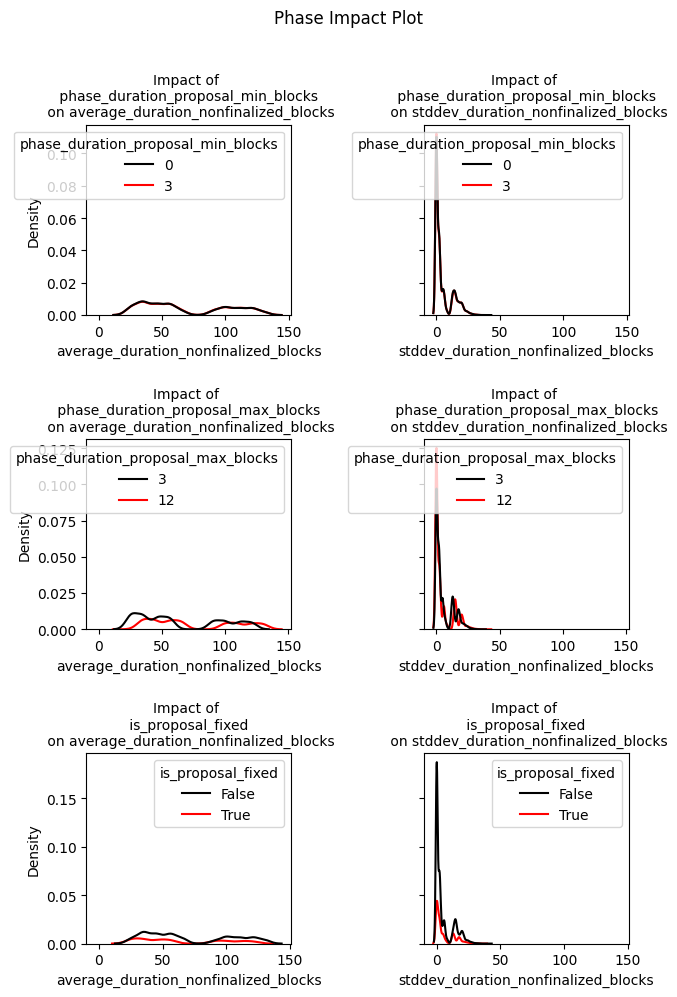

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Ax

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

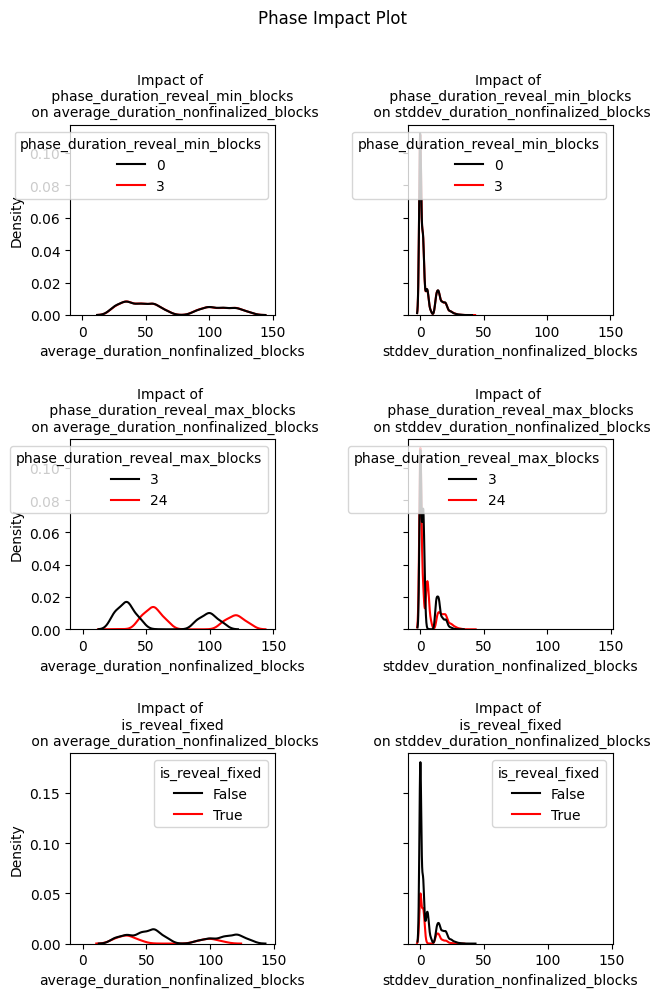

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title=

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

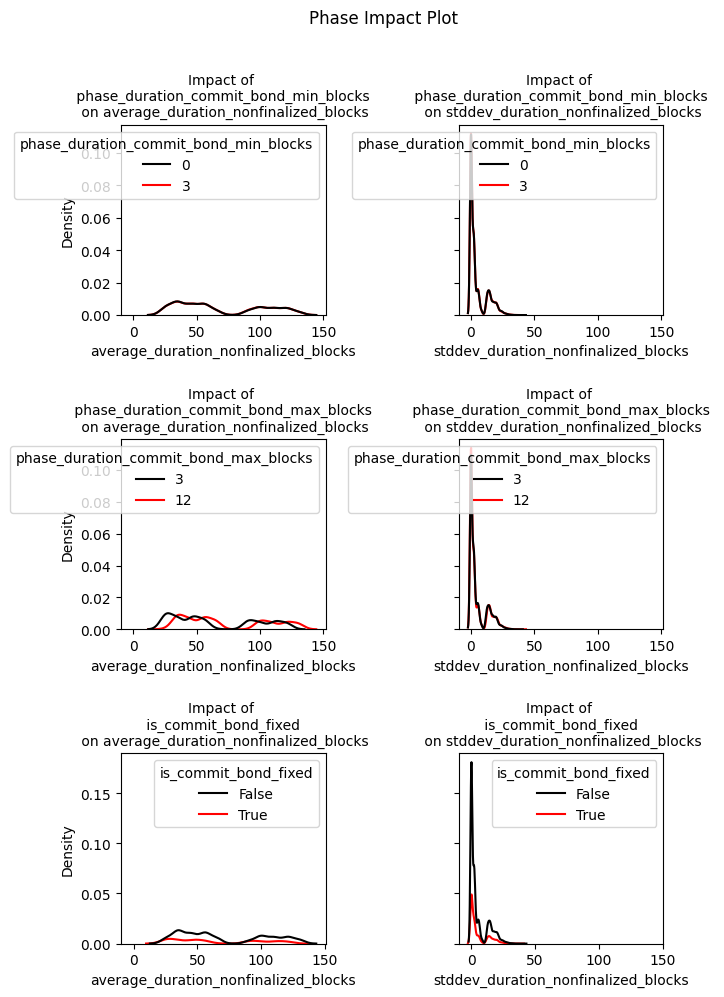

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
/Users/danlessa/repos/bsci/aztec-gddt/aztec_gddt/plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


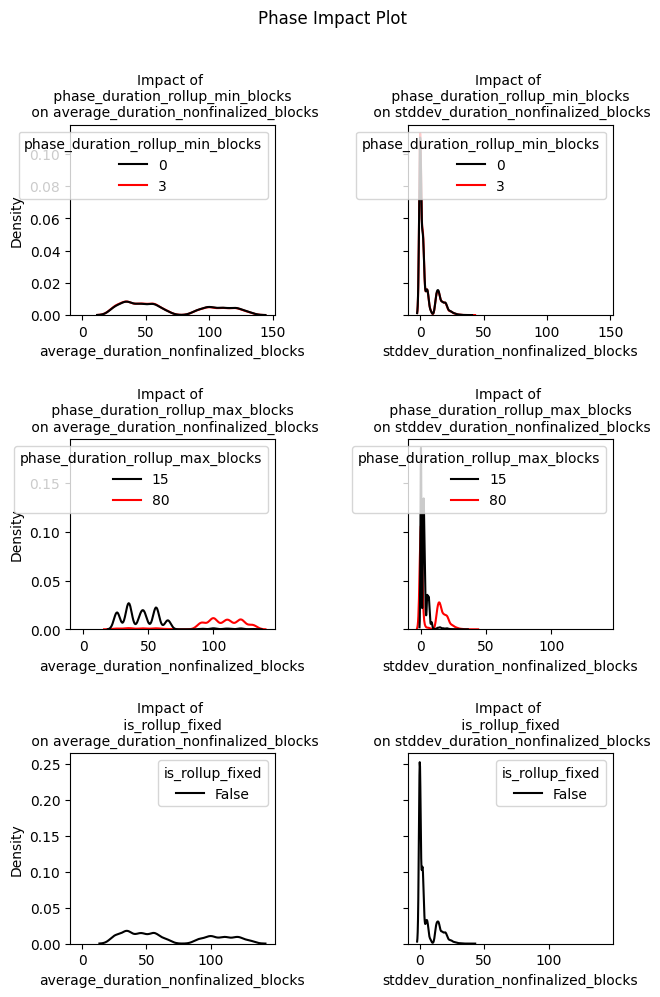

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title=

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

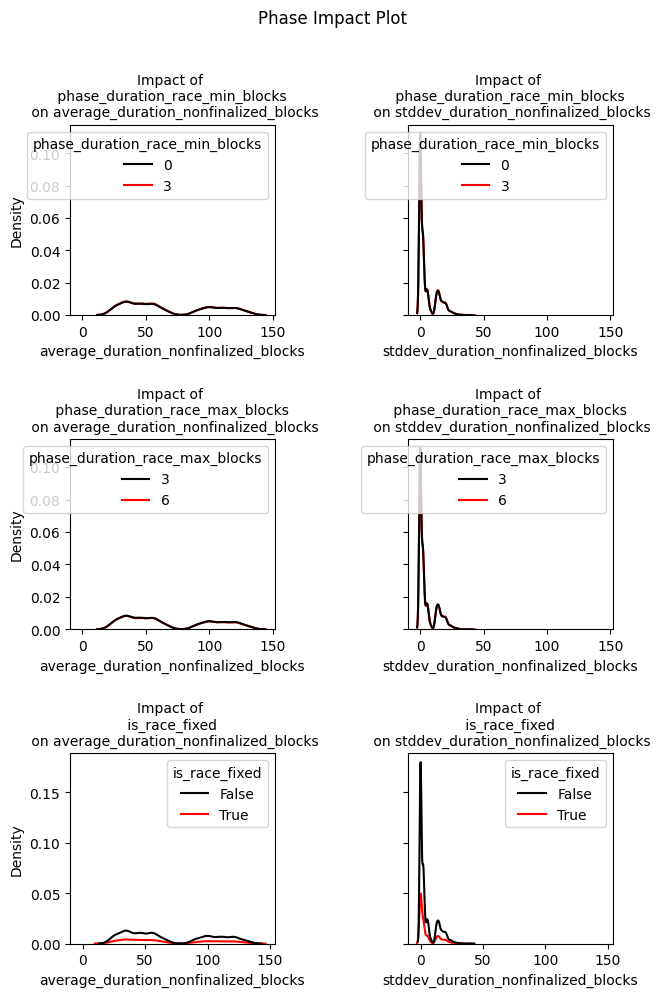

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center':

In [ ]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

In [ ]:
base_df.set_index(governance_surface_params).describe()

simulation         subset          run  proportion_race_mode  \
count  110592.000000  110592.000000  110592.0000         110592.000000   
mean      736.780084      11.997911       2.0000              0.019686   
std       425.670778       7.210990       0.8165              0.022172   
min         0.000000       0.000000       1.0000              0.000000   
25%       368.000000       6.000000       1.0000              0.000000   
50%       737.000000      12.000000       2.0000              0.016667   
75%      1105.000000      18.000000       3.0000              0.032258   
max      1474.000000      24.000000       3.0000              0.214286   

       proportion_slashed_prover  proportion_slashed_sequencer  \
count              110592.000000                 110592.000000   
mean                    0.009527                      0.009968   
std                     0.015752                      0.015813   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.019231                      0.020408   
max                     0.181818                      0.185185   

       proportion_skipped  average_duration_finalized_blocks  \
count       110592.000000                      110592.000000   
mean             0.009527                          75.932392   
std              0.015752                          34.129395   
min              0.000000                          23.340659   
25%              0.000000                          43.000000   
50%              0.000000                          71.650000   
75%              0.019231                         108.000000   
max              0.181818                         129.000000   

       stddev_duration_finalized_blocks  average_duration_nonfinalized_blocks  \
count                     110592.000000                          37280.000000   
mean                           5.055230                             68.383637   
std                            7.052563                             34.150773   
min                            0.000000                             26.000000   
25%                            0.000000                             35.000000   
50%                            1.856740                             56.000000   
75%                            6.751227                            100.000000   
max                           40.960083                            130.000000   

       stddev_duration_nonfinalized_blocks  delta_total_revenue_agents  
count                        110592.000000                    110592.0  
mean                              5.055230                         0.0  
std                               7.052563                         0.0  
min                               0.000000                         0.0  
25%                               0.000000                         0.0  
50%                               1.856740                         0.0  
75%                               6.751227                         0.0  
max                              40.960083                         0.0